#                          PROPERTY PRICE PREDICTION - CHENNAI

# PROBLEM STATEMENT

######  Getting a good estimate of a property is hard even for the most seasoned real estate agents. With the advent of data , it is now possible to get a much more sophisticated data driven valuation of the property

Procedure:
- Analyse dataset.
- Data Cleaning.
- Run multiple experiments to get a descriptive analysis of the data.
- Inference from EDA.
- Build a statistical model to predict the property value.
- Inference from the model.

#### IMPORTING LIBRARIES

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
# load the csv file

df = pd.read_csv("Chennai houseing sale.csv")

# display the observations
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [3]:
df.columns # Columns available

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [4]:
# Data shape

df.shape

(7109, 22)

In [5]:
# check data types of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

## DATA CLEANING 

### NUMERICAL ATTRIBUTES DATA CLEANING

In [6]:
#selecting the numerical attributes, for numerical data cleaning .

df_num = df.select_dtypes(include=np.number)
df_num.head()

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131        1.0         1.0       3       4.0   
1      1986             26        2.0         1.0       5       4.9   
2       909             70        1.0         1.0       3       4.1   
3      1855             14        3.0         2.0       5       4.7   
4      1226             84        1.0         1.0       3       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0          3.9         4.9       4.330   380000  144400      7600000  
1          4.2         2.5       3.765   760122  304049     21717770  
2          3.8         2.2       3.090   421094   92114     13159200  
3          3.9         3.6       4.010   356321   77042      9630290  
4          2.5         4.1       3.290   237000   74063      7406250

In [7]:
# check data types of variables
df_num.dtypes

INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
#checking for null values.
df_num.isnull().sum()

INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
#we have very few null values in three attributes.
#we can impute the null values using mean,median or mode.

In [10]:
#checking the value counts
df_num["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [11]:
#imputing the null values using mode as the data is discrete.
df_num["N_BEDROOM"].fillna(value=1.0,inplace=True)

#checking the values.
df_num["N_BEDROOM"].isnull().sum()

0

In [12]:
#checking the value counts
df_num["N_BATHROOM"].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [13]:
#imputing the null values using mode as the data is discrete.
df_num["N_BATHROOM"].fillna(value=1.0,inplace=True)

#checking the values.
df_num["N_BATHROOM"].isnull().sum()

0

In [14]:
df_num["QS_OVERALL"].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [15]:
#imputing the null values using median. Here the data is continuous.
df_num["QS_OVERALL"].fillna(value=df_num["QS_OVERALL"].median(),inplace=True)

#checking the values.
df_num["QS_OVERALL"].isnull().sum()

0

In [16]:
#all the missing values are imputed.

In [17]:
df_num.isnull().sum()

INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [18]:
#converting the float data type variables into int data type.

df_num.QS_ROOMS=df_num.QS_ROOMS.astype(int)
df_num.QS_BATHROOM=df_num.QS_BATHROOM.astype(int)
df_num.QS_BEDROOM=df_num.QS_BEDROOM.astype(int)
df_num.N_BEDROOM=df_num.N_BEDROOM.astype(int)
df_num.N_BATHROOM=df_num.N_BATHROOM.astype(int)

In [19]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       7109 non-null   int64  
 1   DIST_MAINROAD  7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   int32  
 3   N_BATHROOM     7109 non-null   int32  
 4   N_ROOM         7109 non-null   int64  
 5   QS_ROOMS       7109 non-null   int32  
 6   QS_BATHROOM    7109 non-null   int32  
 7   QS_BEDROOM     7109 non-null   int32  
 8   QS_OVERALL     7109 non-null   float64
 9   REG_FEE        7109 non-null   int64  
 10  COMMIS         7109 non-null   int64  
 11  SALES_PRICE    7109 non-null   int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 527.7 KB


### CATEGORICAL ATTRIBUTES DATA CLEANING

In [20]:
#selecting the categorical attributes, for data cleaning .

df_cat = df.select_dtypes(include='object')
df_cat.head()

PRT_ID        AREA   DATE_SALE SALE_COND PARK_FACIL  DATE_BUILD  \
0  P03210  Karapakkam  04-05-2011  AbNormal        Yes  15-05-1967   
1  P09411  Anna Nagar  19-12-2006  AbNormal         No  22-12-1995   
2  P01812       Adyar  04-02-2012  AbNormal        Yes  09-02-1992   
3  P05346   Velachery  13-03-2010    Family         No  18-03-1988   
4  P06210  Karapakkam  05-10-2009  AbNormal        Yes  13-10-1979   

    BUILDTYPE UTILITY_AVAIL  STREET MZZONE  
0  Commercial        AllPub   Paved      A  
1  Commercial        AllPub  Gravel     RH  
2  Commercial           ELO  Gravel     RL  
3      Others       NoSewr    Paved      I  
4      Others        AllPub  Gravel      C

In [21]:
##checking null values.

df_cat.isnull().sum()

PRT_ID           0
AREA             0
DATE_SALE        0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
dtype: int64

In [22]:
#we dont have any null values in the attributes.

In [23]:
#checking the area attribute
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [24]:
#as we could clearly see the typo errors in the area name, we can replace it.

In [25]:
df_cat["AREA"] = df_cat["AREA"].str.lower()

df_cat["AREA"].replace({'velchery':'velachery', 'kknagar':'kk nagar', 'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'},inplace=True)

df_cat["AREA"].value_counts()  #area names typo errors are replaced.

chrompet      1702
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
Name: AREA, dtype: int64

In [26]:
#checking the Sale condition attribute

df_cat["SALE_COND"].value_counts()    #as we could clearly see the typo errors in the sale condition,so we can replace it.

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [27]:
df_cat["SALE_COND"] = df_cat["SALE_COND"].str.lower()

df_cat["SALE_COND"].replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'},inplace=True)

df_cat["SALE_COND"].value_counts()   #sale condition typo errors are replaced.

adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: SALE_COND, dtype: int64

In [28]:
#checking the Parking facility attribute

df_cat["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [29]:
df_cat["PARK_FACIL"].replace({'Noo':'No'},inplace=True)

df_cat["PARK_FACIL"].value_counts()    #parking facility typo errors are replaced.

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [30]:
#checking the Building type attribute

df_cat["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [31]:
df_cat["BUILDTYPE"].replace({'Comercial':'Commercial',"Other" : "Others"},inplace=True)

df_cat["BUILDTYPE"].value_counts()   #Building type typo errors are replaced.

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [32]:
#checking the Utility attribute

df_cat["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [33]:
df_cat["UTILITY_AVAIL"].replace({'All Pub':'AllPub',"NoSewr " : "NoSeWa"},inplace=True)

df_cat["UTILITY_AVAIL"].value_counts()     #Utility typo errors are replaced.

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [34]:
#checking the Street attribute

df_cat["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [35]:
df_cat["STREET"].replace({'Pavd':'Paved',"NoAccess" : "No Access"},inplace=True)

df_cat["STREET"].value_counts()    #Street typo errors are replaced.

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [36]:
df_cat["DATE_SALE"] = pd.to_datetime(df_cat["DATE_SALE"], format='%d-%m-%Y')

#changing the data type into datetime.

df_cat["DATE_SALE"].describe()

count                    7109
unique                   2798
top       2009-10-06 00:00:00
freq                       12
first     2004-01-16 00:00:00
last      2015-02-17 00:00:00
Name: DATE_SALE, dtype: object

In [37]:
df_cat["DATE_BUILD"] = pd.to_datetime(df_cat["DATE_BUILD"], format='%d-%m-%Y')

#changing the data type into datetime.

df_cat["DATE_BUILD"].describe()

count                    7109
unique                   5808
top       1987-07-02 00:00:00
freq                        6
first     1949-10-28 00:00:00
last      2010-11-12 00:00:00
Name: DATE_BUILD, dtype: object

In [38]:
#all the categorical attributes are cleaned.

## FEATURE ENGINEERING

* Feature Engineering is done for the following:
    - Total Price is arrived from the sum of total cost of the property which includes Saleprice, Registration fee, Commision.
    - Range is achieved by categorising the total price by quantiles from 5-point summary.
    - Build Year is achieved by categorising the Date Build by quantiles from 5-point summary.

In [39]:
df_final = pd.concat([pd.DataFrame(df_num),df_cat],axis=1)
df_final.head()

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131          1           1       3         4   
1      1986             26          2           1       5         4   
2       909             70          1           1       3         4   
3      1855             14          3           2       5         4   
4      1226             84          1           1       3         3   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  ...  PRT_ID        AREA  \
0            3           4       4.330   380000  ...  P03210  karapakkam   
1            4           2       3.765   760122  ...  P09411  anna nagar   
2            3           2       3.090   421094  ...  P01812       adyar   
3            3           3       4.010   356321  ...  P05346   velachery   
4            2           4       3.290   237000  ...  P06210  karapakkam   

   DATE_SALE SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  \
0 2011-05-04  abnormal        Yes 1967-05-15  Commercial        AllPub   
1 2006-12-19  abnormal         No 1995-12-22  Commercial        AllPub   
2 2012-02-04  abnormal        Yes 1992-02-09  Commercial           ELO   
3 2010-03-13    family         No 1988-03-18      Others        NoSeWa   
4 2009-10-05  abnormal        Yes 1979-10-13      Others        AllPub   

   STREET MZZONE  
0   Paved      A  
1  Gravel     RH  
2  Gravel     RL  
3   Paved      I  
4  Gravel      C  

[5 rows x 22 columns]

In [40]:
def feature_engg2(x):
    if x <= 1975 :
        return "<1975"
    elif x >= 1976 and x <= 1990:
        return "1976 - 1990"
    elif x >= 1991 and x <= 2000 :
        return "1991 - 2000"
    else :
        return "> 2001"

In [41]:
df_final["Build_Year"] = df_final["DATE_BUILD"].dt.year.map(feature_engg2)

In [42]:
df_final["Build_Year"].value_counts()

1976 - 1990    2650
1991 - 2000    1814
<1975          1700
> 2001          945
Name: Build_Year, dtype: int64

In [43]:
df_final['Age'] = pd.DatetimeIndex(df_final.DATE_SALE).year - pd.DatetimeIndex(df_final.DATE_BUILD).year

In [44]:
def feature_engg(x):
    if x <= 8645792 :
        return "Affordable"
    elif x >= 8645793 and x <= 10819532:
        return "Mid Range"
    elif x >= 10819533 and x <= 17500000 :
        return "Premium"
    else :
        return "Luxury"

In [45]:
df_final['Total_Price'] = df_final['REG_FEE'] + df_final['COMMIS'] + df_final['SALES_PRICE']

In [46]:
df_final["Range"] = df_final["Total_Price"].map(feature_engg)
df_final["Range"].value_counts()

Premium       2967
Affordable    1778
Mid Range     1777
Luxury         587
Name: Range, dtype: int64

# EXPLORATORY  DATA  ANALYSIS

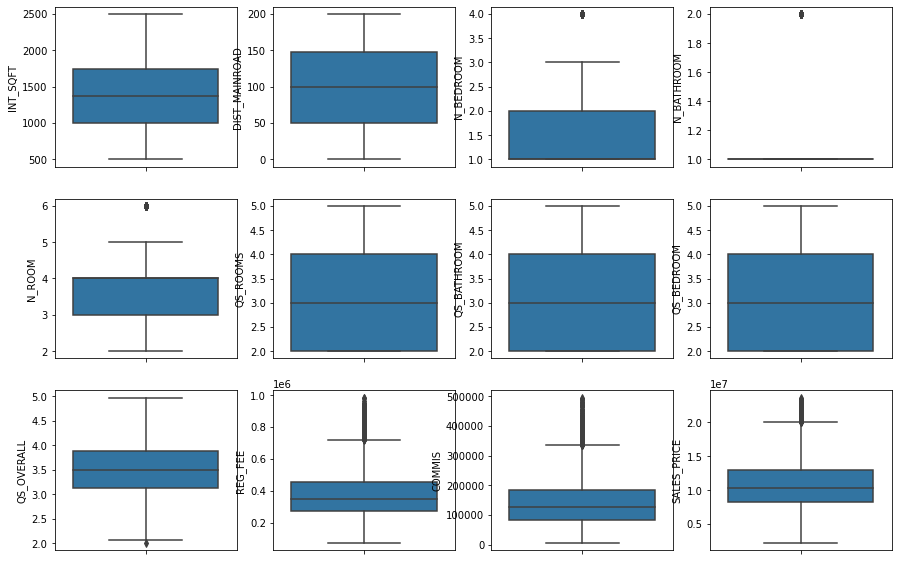

In [47]:
#checking the outliers using boxplot

plt.subplots(figsize=(15,10))
for i,c in enumerate(df_num,1):
    plt.subplot(3,4,i)
    sns.boxplot(y = df_num[c])

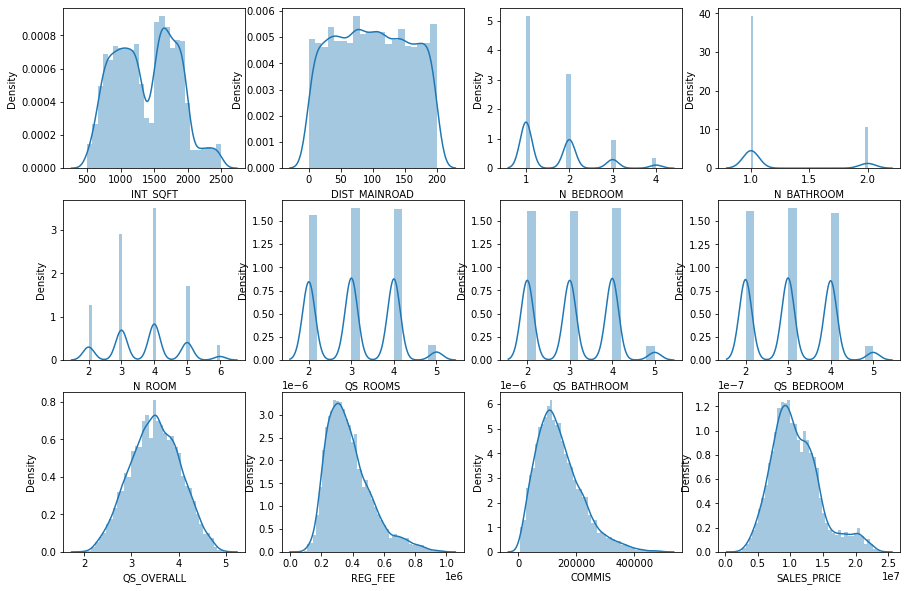

In [48]:
#checking the kde using distplot.

plt.subplots(figsize=(15,10))
for i,c in enumerate(df_num,1):
    plt.subplot(3,4,i)
    sns.distplot(df_num[c])

In [49]:
#checkig=ng the correlation between the numerical attributes.

cor = df_final.corr()
cor

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT       1.000000       0.002022   0.786263    0.515290  0.951279   
DIST_MAINROAD  0.002022       1.000000  -0.002723    0.001850  0.002301   
N_BEDROOM      0.786263      -0.002723   1.000000    0.755207  0.840209   
N_BATHROOM     0.515290       0.001850   0.755207    1.000000  0.568541   
N_ROOM         0.951279       0.002301   0.840209    0.568541  1.000000   
QS_ROOMS       0.016146       0.013050   0.011434    0.010452  0.013468   
QS_BATHROOM   -0.011463      -0.021857  -0.008603   -0.011005 -0.009066   
QS_BEDROOM     0.005847       0.002757   0.014449    0.013390  0.012072   
QS_OVERALL     0.013979      -0.017258   0.014240    0.007959  0.015406   
REG_FEE        0.657544       0.011600   0.455380    0.260244  0.630932   
COMMIS         0.571076       0.010994   0.430446    0.256726  0.533343   
SALES_PRICE    0.612125       0.018783   0.330987    0.108834  0.602760   
Age           -0.012610      -0.003559  -0.045873   -0.020403 -0.033316   
Total_Price    0.620010       0.018584   0.341300    0.118533  0.609345   

               QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE  \
INT_SQFT       0.016146    -0.011463    0.005847    0.013979  0.657544   
DIST_MAINROAD  0.013050    -0.021857    0.002757   -0.017258  0.011600   
N_BEDROOM      0.011434    -0.008603    0.014449    0.014240  0.455380   
N_BATHROOM     0.010452    -0.011005    0.013390    0.007959  0.260244   
N_ROOM         0.013468    -0.009066    0.012072    0.015406  0.630932   
QS_ROOMS       1.000000     0.001796    0.009590    0.489271  0.014614   
QS_BATHROOM    0.001796     1.000000   -0.011917    0.513577 -0.014777   
QS_BEDROOM     0.009590    -0.011917    1.000000    0.598152  0.018875   
QS_OVERALL     0.489271     0.513577    0.598152    1.000000  0.022404   
REG_FEE        0.014614    -0.014777    0.018875    0.022404  1.000000   
COMMIS         0.007072    -0.008397    0.019376    0.016942  0.659903   
SALES_PRICE    0.016059    -0.019469    0.015044    0.020474  0.878148   
Age            0.016799     0.021299   -0.012554    0.012517 -0.116322   
Total_Price    0.016012    -0.019302    0.015442    0.020710  0.888335   

                 COMMIS  SALES_PRICE       Age  Total_Price  
INT_SQFT       0.571076     0.612125 -0.012610     0.620010  
DIST_MAINROAD  0.010994     0.018783 -0.003559     0.018584  
N_BEDROOM      0.430446     0.330987 -0.045873     0.341300  
N_BATHROOM     0.256726     0.108834 -0.020403     0.118533  
N_ROOM         0.533343     0.602760 -0.033316     0.609345  
QS_ROOMS       0.007072     0.016059  0.016799     0.016012  
QS_BATHROOM   -0.008397    -0.019469  0.021299    -0.019302  
QS_BEDROOM     0.019376     0.015044 -0.012554     0.015442  
QS_OVERALL     0.016942     0.020474  0.012517     0.020710  
REG_FEE        0.659903     0.878148 -0.116322     0.888335  
COMMIS         1.000000     0.626275 -0.089556     0.642178  
SALES_PRICE    0.626275     1.000000 -0.118842     0.999649  
Age           -0.089556    -0.118842  1.000000    -0.119536  
Total_Price    0.642178     0.999649 -0.119536     1.000000

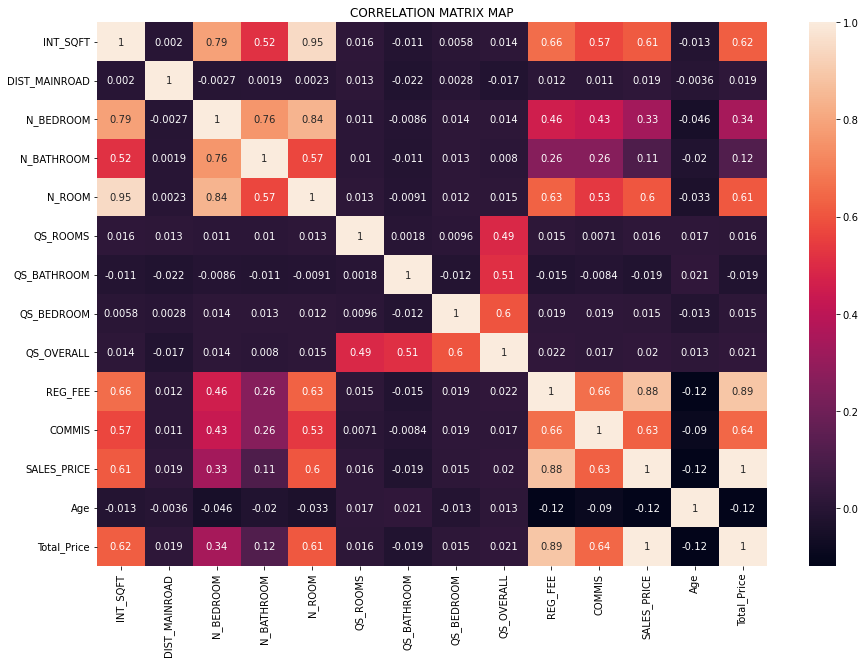

In [50]:
#plotting the correlation matrix using heat map.

plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.title("CORRELATION MATRIX MAP")
plt.show()

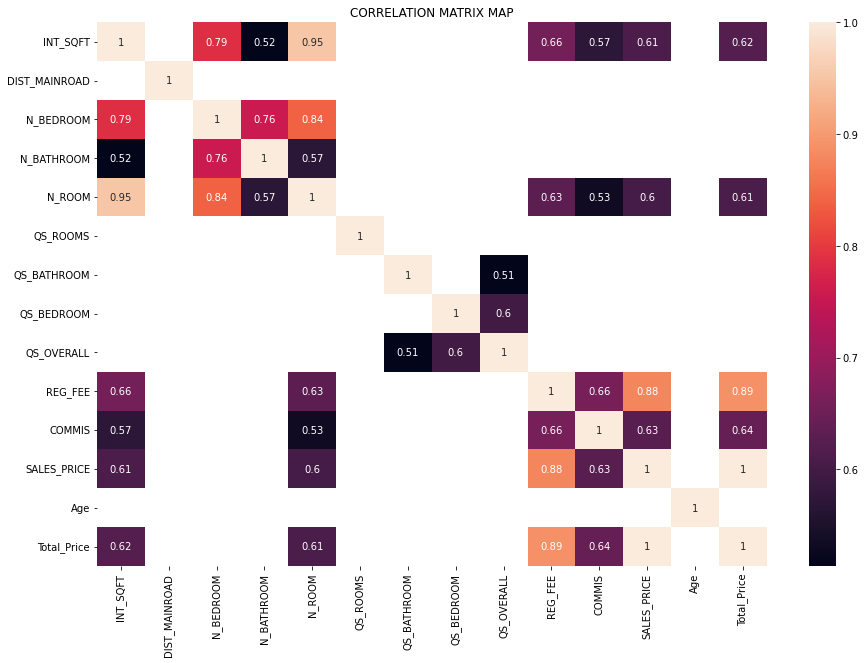

In [51]:
#for easy visualization, we plot the attributes which has correlaton > +- 0.5
plt.subplots(figsize=(15,10))
sns.heatmap(cor[(cor > 0.5) | (cor < -0.5)],annot=True)
plt.title("CORRELATION MATRIX MAP")
plt.show()

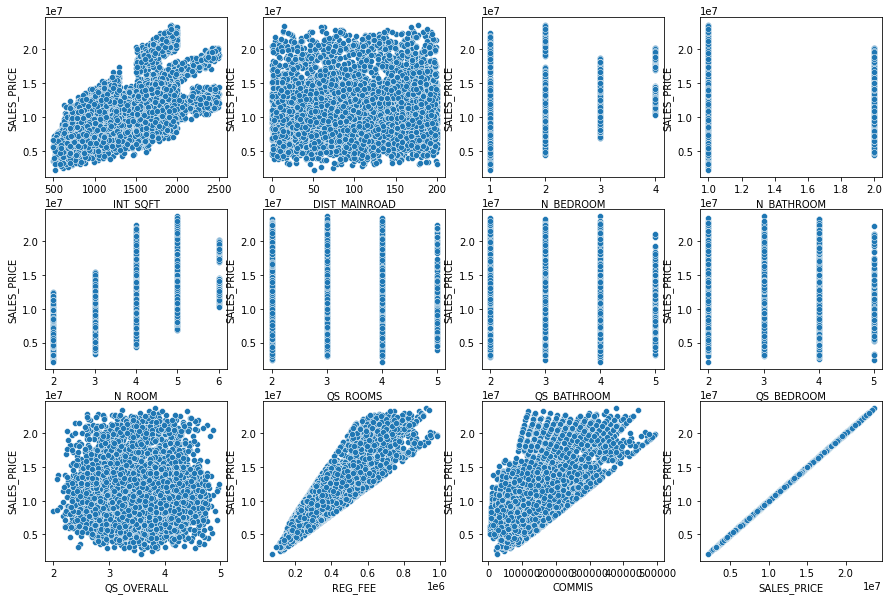

In [52]:
#with the sale price as the target variable, we visualize the correlation between sales price and other num variables.

plt.subplots(figsize=(15,10))
for i,c in enumerate(df_num,1):
    plt.subplot(3,4,i)
    sns.scatterplot(y=df_num["SALES_PRICE"],x=df_num[c])

## Plotting the Total Property Count in Different areas of Chennai.


In [53]:
df_final["AREA"].value_counts().sort_values()

t nagar        501
adyar          774
anna nagar     788
velachery      981
kk nagar       997
karapakkam    1366
chrompet      1702
Name: AREA, dtype: int64

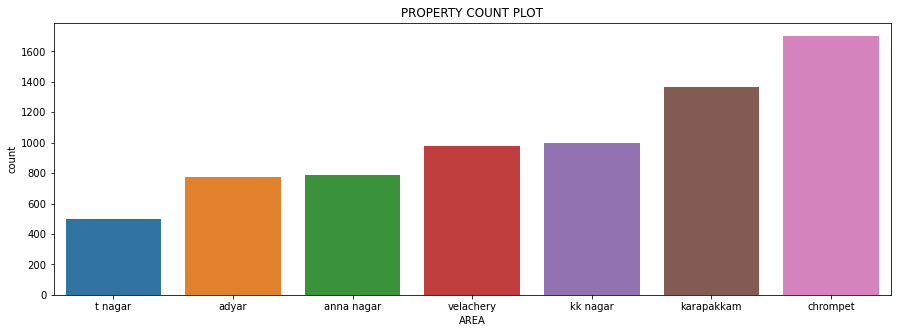

In [54]:
plt.subplots(figsize=(15,5))
sns.countplot(df_final["AREA"],order=['t nagar','adyar','anna nagar','velachery','kk nagar','karapakkam','chrompet'])
plt.title("PROPERTY COUNT PLOT")
plt.show()

* Chrompet has the highest number of properties built followed by Karapakkam.
* T-Nagar has the least number of properties built in Chennai.

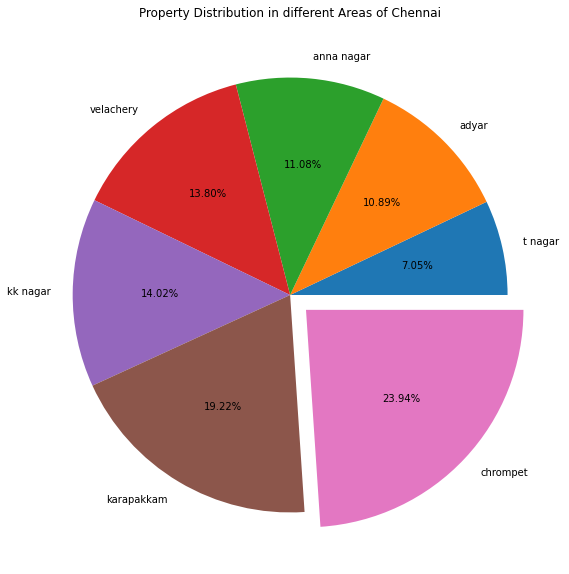

In [55]:
plt.subplots(figsize=(15,10))
plt.pie(data=df_final,x= df_final["AREA"].value_counts().sort_values(), autopct="%0.2f%%",labels=df_final["AREA"].value_counts().sort_values().index,explode=[0,0,0,0,0,0,0.1])
plt.title("Property Distribution in different Areas of Chennai")
plt.show()

* We could clearly infer that out of 7109 properties, 23.94% of properties are from Chrompet, followed by Karapakkam.
* T.nagar has the least no. of property with 7.05%.

## Plotting the Price Range of Properties in Chennai.

In [56]:
df_final.groupby('AREA')['Total_Price'].mean().sort_values().to_frame()

Total_Price
AREA                    
karapakkam  7.755477e+06
adyar       9.580581e+06
chrompet    1.040800e+07
velachery   1.158841e+07
kk nagar    1.341933e+07
anna nagar  1.584423e+07
t nagar     1.632265e+07

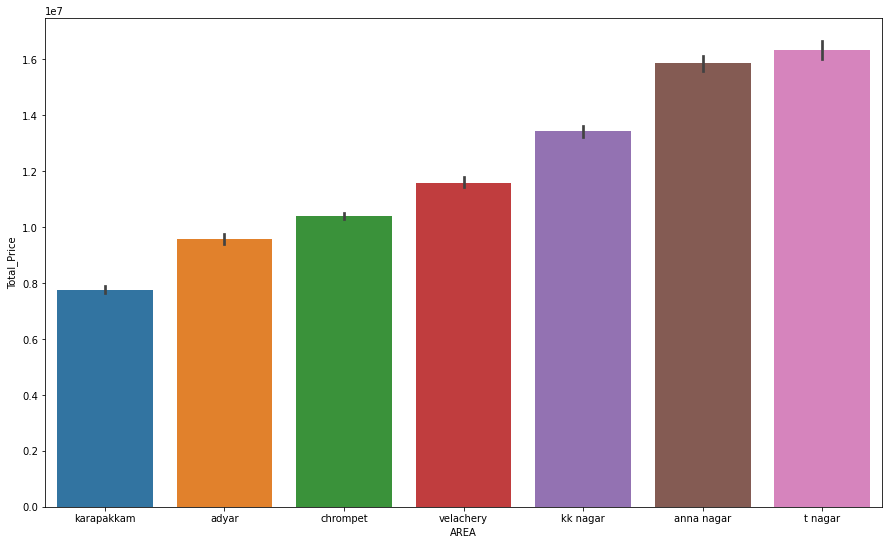

In [57]:
plt.subplots(figsize=(15,9))
sns.barplot(x=df_final.AREA,y=df_final.Total_Price,order=df_final.groupby('AREA')['Total_Price'].mean().reset_index().sort_values('Total_Price')['AREA'])
plt.show()

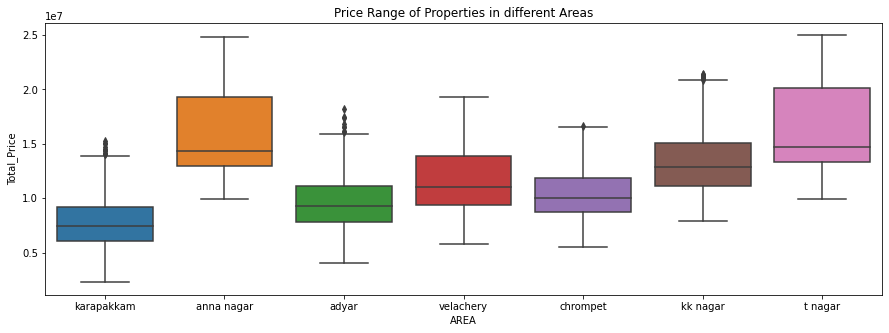

In [58]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df_final,x="AREA",y="Total_Price")
plt.title("Price Range of Properties in different Areas");

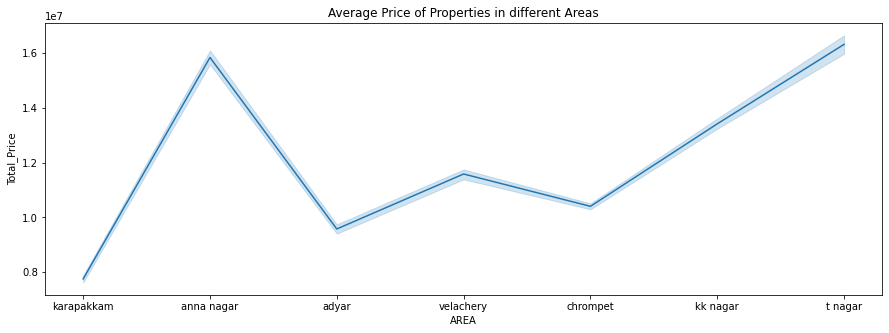

In [59]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_final,x="AREA",y="Total_Price")
plt.title("Average Price of Properties in different Areas")
plt.show()

* Average property price is highest in T-nagar followed by Anna Nagar.
* It is found to be lowest in Karapakkam.

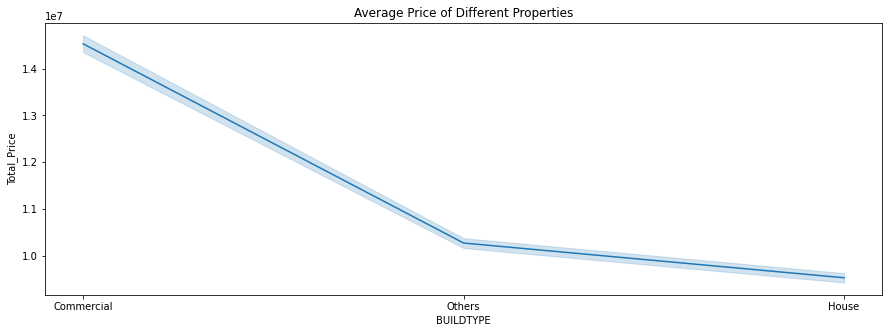

In [60]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_final,x="BUILDTYPE",y="Total_Price")
plt.title("Average Price of Different Properties")
plt.show()

* We can observe the Commercial Propert has the highest price tag among the different types of building. 

## Square feet range of Properties in different areas of Chennai.
 

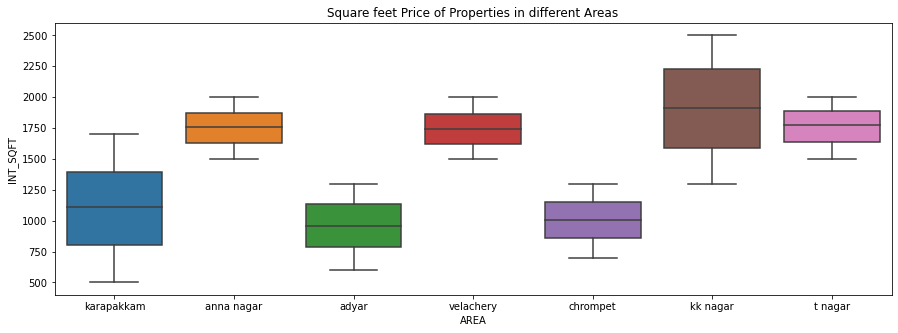

In [61]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df_final,x="AREA",y="INT_SQFT")
plt.title("Square feet Price of Properties in different Areas")
plt.show()

* In terms of SQFT, KK Nagar has the highest range while Karapakkam covers a range from Affordable to Premium.
* Adyar and Chrompet has a moderate range around 1000/SQFT while the other areas range similarly around 1750/SQFT.

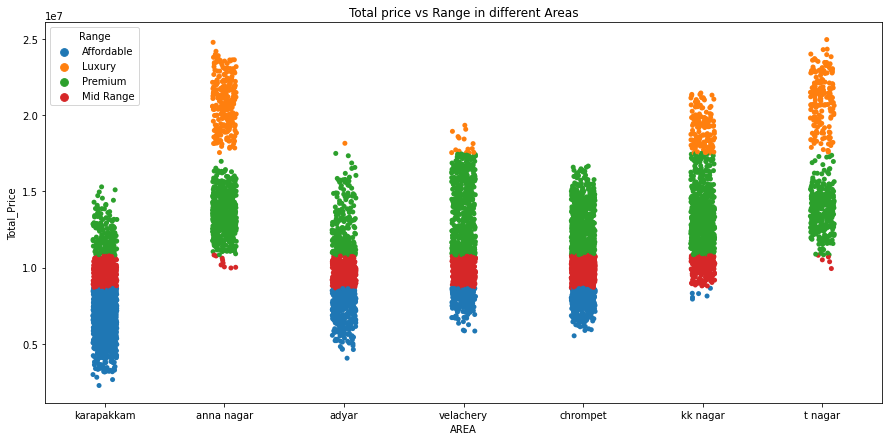

In [62]:
plt.subplots(figsize=(15,7))
sns.stripplot(data=df_final,y="Total_Price",x="AREA", hue="Range")
plt.title("Total price vs Range in different Areas");

* From the building category, we can observe that most of the luxurious buildings are built in T-Nagar and Anna Nagar.
* All the areas have a good quantum of premium buildings.
* Karapakkam has the highest range of affordable buildings. It could be a good buy from an investment perspective.

## Impact of Mainroad on Total Price

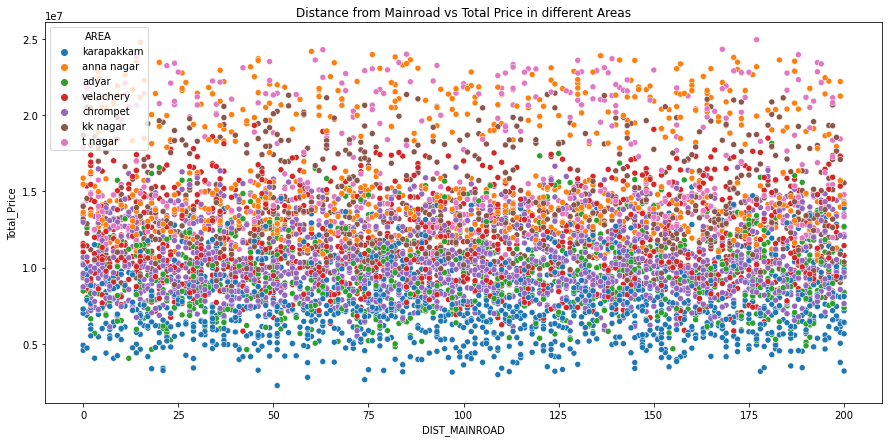

In [63]:
plt.subplots(figsize=(15,7))
sns.scatterplot(data=df_final,y="Total_Price",x="DIST_MAINROAD", hue="AREA")
plt.title("Distance from Mainroad vs Total Price in different Areas")
plt.show()

* The above distribution shows that the distance from mainroad doesn't affect the price of the property.

## Impact of Number of Bedrooms on the Property Price 

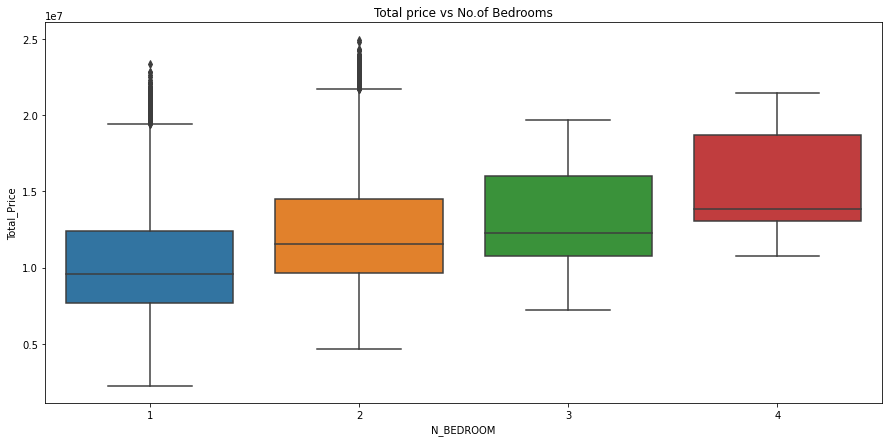

In [64]:
plt.subplots(figsize=(15,7))
sns.boxplot(data=df_final,y="Total_Price",x="N_BEDROOM")
plt.title("Total price vs No.of Bedrooms")
plt.show()

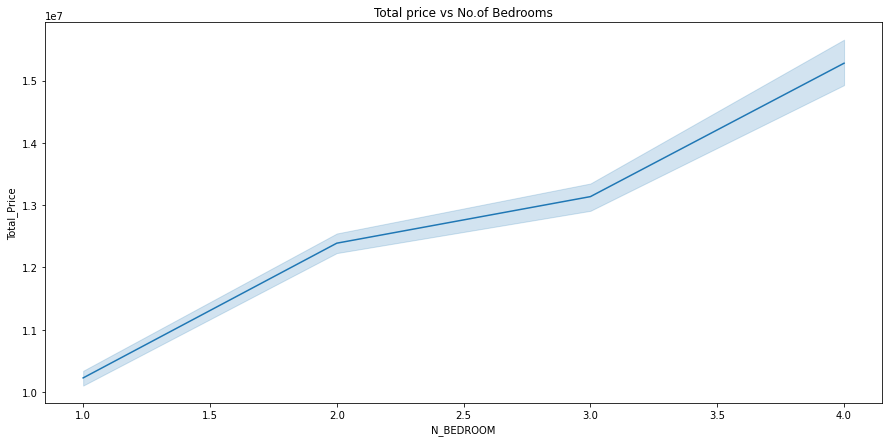

In [65]:
plt.subplots(figsize=(15,7))
sns.lineplot(data=df_final,y="Total_Price",x="N_BEDROOM")
plt.title("Total price vs No.of Bedrooms")
plt.show()

* We can observe with increase in bedrooms, the property cost increases significantly. 

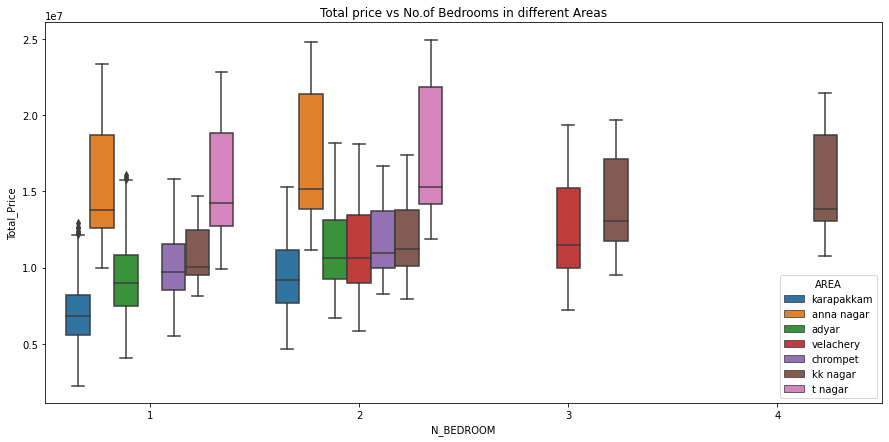

In [66]:
plt.subplots(figsize=(15,7))
sns.boxplot(data=df_final,y="Total_Price",x="N_BEDROOM", hue="AREA")
plt.title("Total price vs No.of Bedrooms in different Areas");

* We can see the same trend with each area.
* 4 Bedroom houses are available only in KK Nagar.
* Velachery has buildings with only 2 and 3 Bedrooms.

## Impact of Parking Facility on Total Price

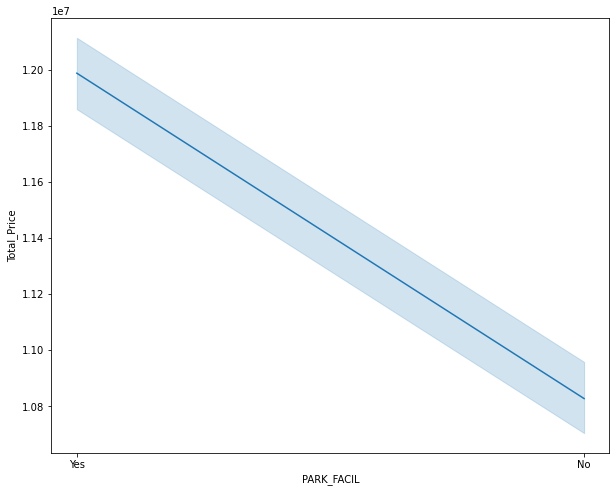

In [67]:
plt.figure(figsize=(10,8))
sns.lineplot(df_final["PARK_FACIL"],df_final["Total_Price"])
plt.show()

* The direct impact of a parking spot is that the total price goes up by around 10L.

In [68]:
df_final.groupby(["PARK_FACIL","N_ROOM"])["Total_Price"].mean()

PARK_FACIL  N_ROOM
No          2         6.753987e+06
            3         9.179004e+06
            4         1.170137e+07
            5         1.408292e+07
            6         1.465720e+07
Yes         2         7.895197e+06
            3         1.019325e+07
            4         1.281704e+07
            5         1.554333e+07
            6         1.597385e+07
Name: Total_Price, dtype: float64

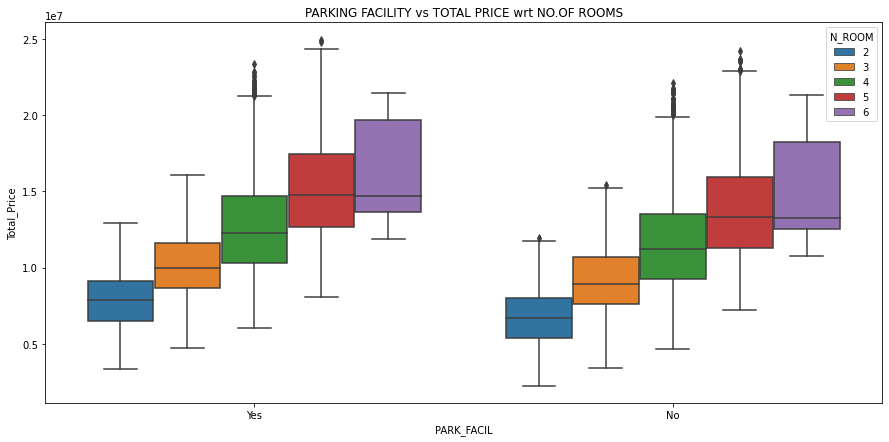

In [69]:
plt.subplots(figsize=(15,7))
sns.boxplot(data=df_final,x="PARK_FACIL",y="Total_Price",hue="N_ROOM")
plt.title("PARKING FACILITY vs TOTAL PRICE wrt NO.OF ROOMS");

* There is a gradual increase in the parking cost based on the number of rooms of the property.

In [70]:
c=df_final.groupby(["AREA","PARK_FACIL","N_ROOM"])["Total_Price"].mean().to_frame()
c

Total_Price
AREA       PARK_FACIL N_ROOM              
adyar      No         2       7.428005e+06
                      3       9.394610e+06
                      4       1.079412e+07
           Yes        2       8.489316e+06
                      3       1.029184e+07
                      4       1.188893e+07
anna nagar No         4       1.446695e+07
                      5       1.652280e+07
           Yes        4       1.590163e+07
                      5       1.715516e+07
chrompet   No         2       8.217741e+06
                      3       9.880029e+06
                      4       1.134651e+07
           Yes        2       9.288251e+06
                      3       1.102840e+07
                      4       1.223141e+07
karapakkam No         2       5.562042e+06
                      3       7.377746e+06
                      4       9.037930e+06
           Yes        2       6.633004e+06
                      3       8.139791e+06
                      4       9.910804e+06
kk nagar   No         3       1.078122e+07
                      4       1.138462e+07
                      5       1.338498e+07
                      6       1.465720e+07
           Yes        3       1.080262e+07
                      4       1.232204e+07
                      5       1.467108e+07
                      6       1.597385e+07
t nagar    No         4       1.485943e+07
                      5       1.614178e+07
           Yes        4       1.606670e+07
                      5       1.837350e+07
velachery  No         4       1.048241e+07
                      5       1.154280e+07
           Yes        4       1.174264e+07
                      5       1.304637e+07

* Another trend observed from the above data is the cost of Parking slot is influenced by the Area of the property along with the room number as the average cost of Parking facility varies for each area.

## Trend in Sale Price w.r.t Sale Year

In [71]:
# Sale Year is extracted from DATE_SALE data.
df_final["sale_year"]=df_final["DATE_SALE"].dt.to_period('Y')

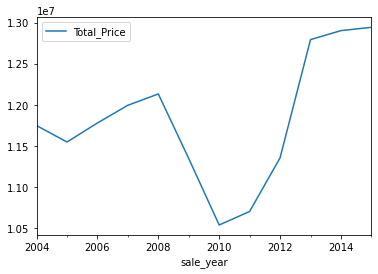

In [72]:
df_final.groupby("sale_year")["sale_year","Total_Price"].mean().plot(kind="line")
plt.show()

* The data shows a steady increse in sale price until 2008 after which there is a srastict decline until 2010. The potential reason could be the 2008 recession. There was a steady increase post 2010 which saturated around 2013.

In [73]:
df1=pd.DataFrame()
df1["YEAR"]=df_final["DATE_SALE"].dt.to_period('Y').astype(int)-df_final["DATE_BUILD"].dt.to_period('Y').astype(int)

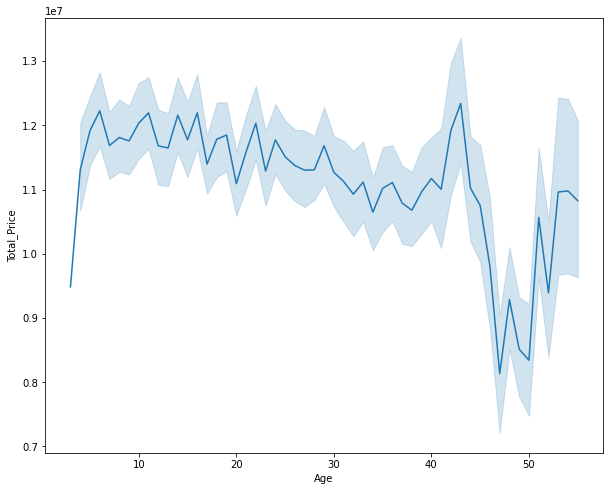

In [74]:
plt.figure(figsize=(10,8))

sns.lineplot(df_final["Age"],df_final["Total_Price"],)
plt.show()

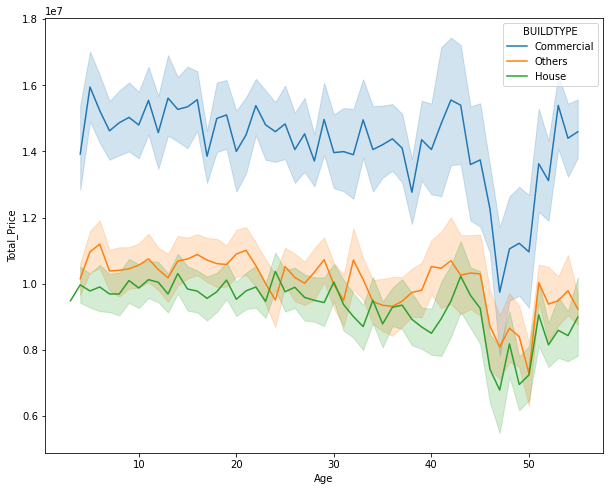

In [75]:
plt.figure(figsize=(10,8))

sns.lineplot(df_final["Age"],df_final["Total_Price"],hue=df_final["BUILDTYPE"])
plt.show()

* As the age of building increase, there is a gradual decrease in price of the property. The sudden dip could be explaind from the previous graph.
* The same trend is visible irrespective of the type of building.

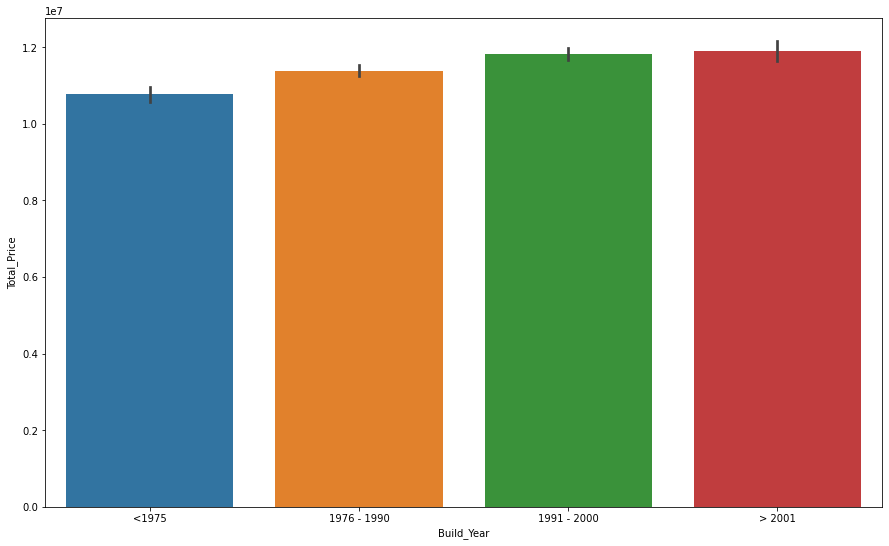

In [76]:
plt.subplots(figsize=(15,9))
sns.barplot(x=df_final.Build_Year,y=df_final.Total_Price,order=df_final.groupby('Build_Year')['Total_Price'].mean().reset_index().sort_values('Total_Price')['Build_Year'])
plt.show()

In [77]:
df_final.groupby('Build_Year')["Total_Price"].mean().sort_values()

Build_Year
<1975          1.076683e+07
1976 - 1990    1.138308e+07
1991 - 2000    1.181664e+07
> 2001         1.188342e+07
Name: Total_Price, dtype: float64

In [78]:
df_final.Build_Year.value_counts().sort_values()

> 2001          945
<1975          1700
1991 - 2000    1814
1976 - 1990    2650
Name: Build_Year, dtype: int64

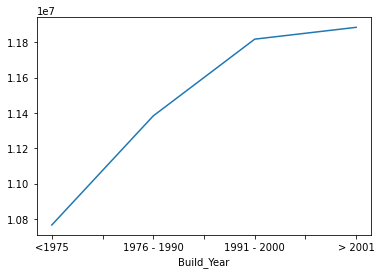

In [79]:
df_final.groupby('Build_Year')["Total_Price"].mean().sort_values().plot(kind='line')
plt.show()

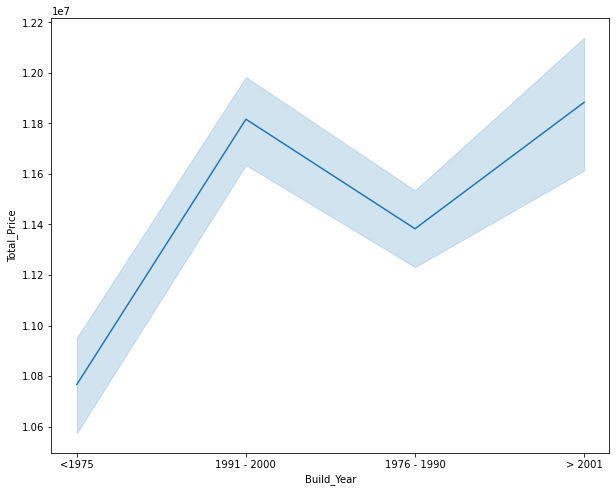

In [80]:
plt.figure(figsize=(10,8))

sns.lineplot(df_final["Build_Year"],df_final["Total_Price"])
plt.show()

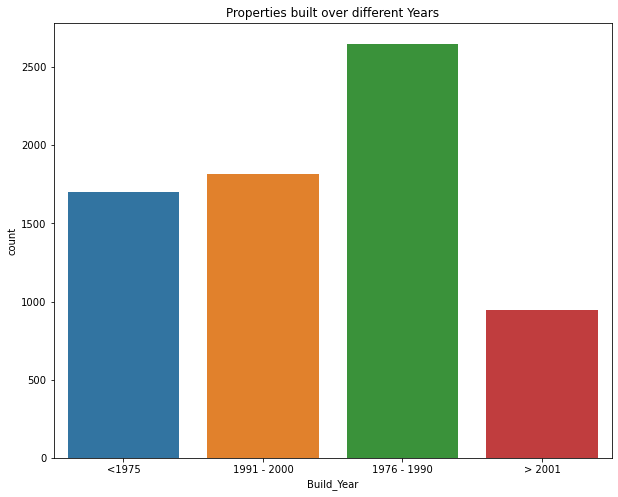

In [81]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.countplot(df_final["Build_Year"])
plt.title('Properties built over different Years')
plt.show()

* We can see a drastic increase in property development post 1975 until 1990 which drops gradually from 1991.
* We can infer that there was a high demand for properties during 1976-1990 which started to decrease after 1990.

## Type of Property Developed w.r.t Access

In [82]:
pd.crosstab(df_final["STREET"],df_final["Range"],margins=True)

Range      Affordable  Luxury  Mid Range  Premium   All
STREET                                                 
Gravel            448     230        665     1177  2520
No Access         752     128        445      692  2017
Paved             578     229        667     1098  2572
All              1778     587       1777     2967  7109

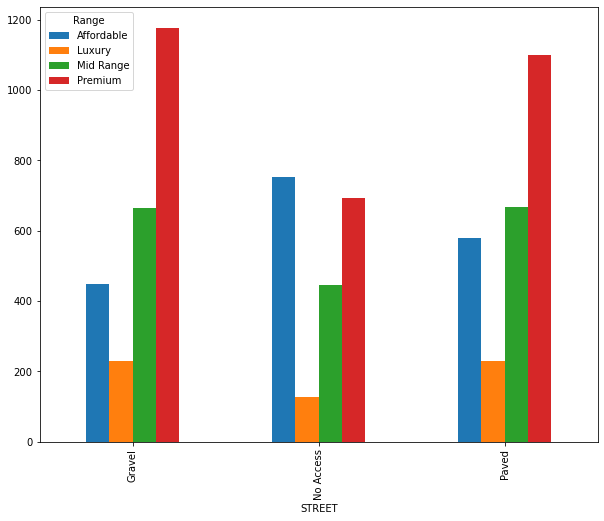

In [83]:
pd.crosstab(df_final["STREET"],df_final["Range"]).plot(kind="bar")
plt.show()

* We can observe an overall dip of 20% in count of buildings developed where there is no access compared to streets with access.
* There is also a big dip in development of Premium properties where there is no access.
* With no access, we can observe an increase in affordable properties.

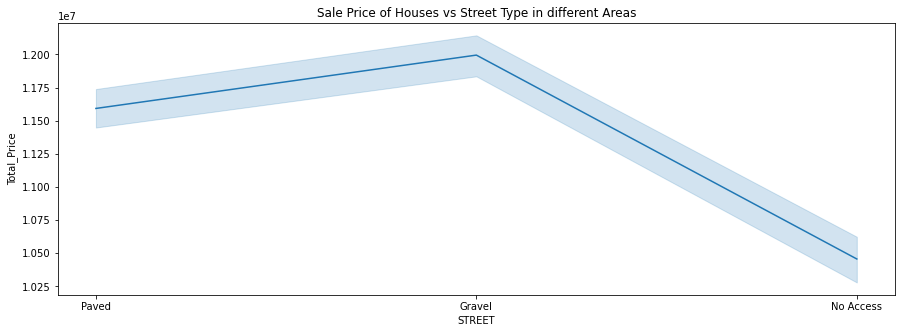

In [84]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_final,x="STREET",y="Total_Price")
plt.title("Sale Price of Houses vs Street Type in different Areas");

* The above plot adds up to our previous observation where the access affects the Total price of the property.
* With no access, the price comes down on an average by 10L-15L.

## Impact of Sale Condition on Total Price

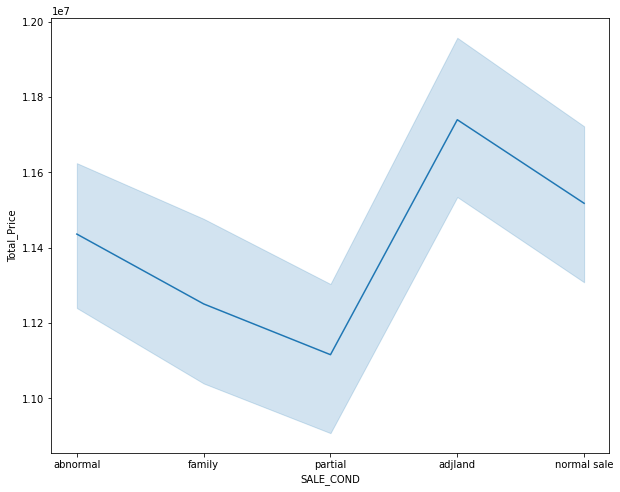

In [85]:
sns.lineplot(df_final["SALE_COND"],df_final["Total_Price"]);

* We can observe a high price tag on Adjacent Land. We can infer that there is more value to a land compared to a developed plot near it.
* We can also notice a low price tag on a Partial which represents an under construction property. We can infer that a partially developed property is a great option to consider for a low budget buyer.

## Average property price trend w.r.t Zone

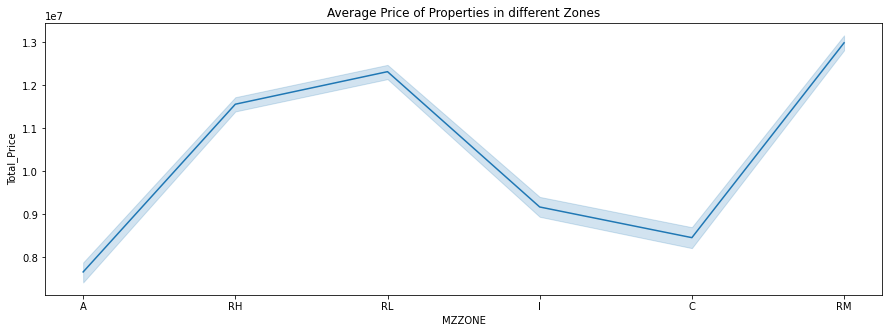

In [86]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_final,x="MZZONE",y="Total_Price")
plt.title("Average Price of Properties in different Zones");

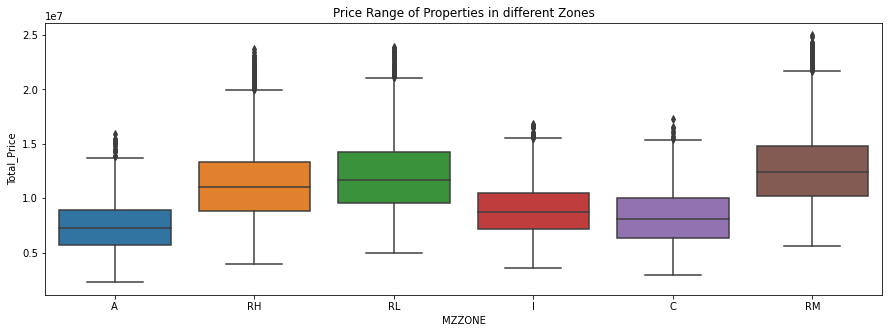

In [87]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df_final,x="MZZONE",y="Total_Price")
plt.title("Price Range of Properties in different Zones");

* From a Developer perspective, MMZones: RL,RM gives the highest ROI.
* The best buy zones for the buyers are A & C.

## Impact of Utility on Property Price

In [88]:
df_final.groupby("UTILITY_AVAIL")["Total_Price"].mean()

UTILITY_AVAIL
AllPub    1.174658e+07
ELO       1.094887e+07
NoSeWa    1.143351e+07
Name: Total_Price, dtype: float64

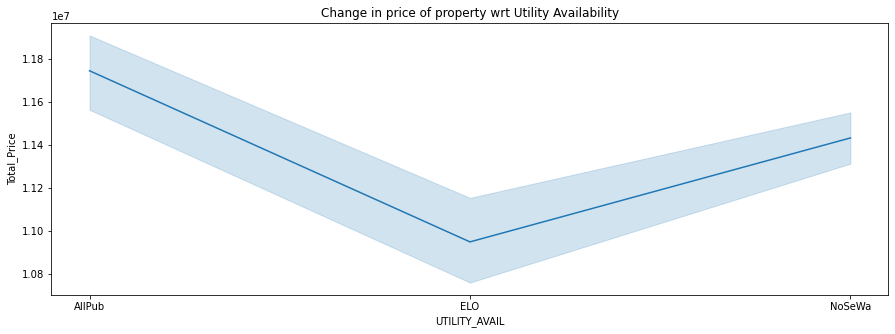

In [89]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_final,x="UTILITY_AVAIL",y="Total_Price")
plt.title("Change in price of property wrt Utility Availability");

* The impact of the type of Utility available is comparitively negligible. The average change in total cost will be around 3L.

##### 

# Inference from the Descriptive Analysis

* The following variables significantly impact the Total Price of the property:
    - Area
    - BuildType
    - SQFT/Rooms
    - Parking
    - Access
    - Sale Condition

#### 

## MODEL BUILDING

In [90]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# functions for forward selection (standalone machine can use mlxtend)
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [91]:
df_final['PRT_ID'].nunique()

7109

In [92]:
df_final.shape

(7109, 27)

In [93]:
df_final.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'Build_Year', 'Age', 'Total_Price', 'Range', 'sale_year'],
      dtype='object')

In [94]:
df_final.head()

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131          1           1       3         4   
1      1986             26          2           1       5         4   
2       909             70          1           1       3         4   
3      1855             14          3           2       5         4   
4      1226             84          1           1       3         3   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  PRT_ID  \
0            3           4    4.330000   380000  144400      7600000  P03210   
1            4           2    3.765000   760122  304049     21717770  P09411   
2            3           2    3.090000   421094   92114     13159200  P01812   
3            3           3    4.010000   356321   77042      9630290  P05346   
4            2           4    3.290000   237000   74063      7406250  P06210   

         AREA  DATE_SALE SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE  \
0  karapakkam 2011-05-04  abnormal        Yes 1967-05-15  Commercial   
1  anna nagar 2006-12-19  abnormal         No 1995-12-22  Commercial   
2       adyar 2012-02-04  abnormal        Yes 1992-02-09  Commercial   
3   velachery 2010-03-13    family         No 1988-03-18      Others   
4  karapakkam 2009-10-05  abnormal        Yes 1979-10-13      Others   

  UTILITY_AVAIL  STREET MZZONE   Build_Year  Age  Total_Price       Range  \
0        AllPub   Paved      A        <1975   44      8124400  Affordable   
1        AllPub  Gravel     RH  1991 - 2000   11     22781941      Luxury   
2           ELO  Gravel     RL  1991 - 2000   20     13672408     Premium   
3        NoSeWa   Paved      I  1976 - 1990   22     10063653   Mid Range   
4        AllPub  Gravel      C  1976 - 1990   30      7717313  Affordable   

  sale_year  
0      2011  
1      2006  
2      2012  
3      2010  
4      2009

In [95]:
c = df_final.corr()
c[(c>0.5)|(c<-0.5)]

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM   N_ROOM  \
INT_SQFT       1.000000            NaN   0.786263    0.515290 0.951279   
DIST_MAINROAD       NaN       1.000000        NaN         NaN      NaN   
N_BEDROOM      0.786263            NaN   1.000000    0.755207 0.840209   
N_BATHROOM     0.515290            NaN   0.755207    1.000000 0.568541   
N_ROOM         0.951279            NaN   0.840209    0.568541 1.000000   
QS_ROOMS            NaN            NaN        NaN         NaN      NaN   
QS_BATHROOM         NaN            NaN        NaN         NaN      NaN   
QS_BEDROOM          NaN            NaN        NaN         NaN      NaN   
QS_OVERALL          NaN            NaN        NaN         NaN      NaN   
REG_FEE        0.657544            NaN        NaN         NaN 0.630932   
COMMIS         0.571076            NaN        NaN         NaN 0.533343   
SALES_PRICE    0.612125            NaN        NaN         NaN 0.602760   
Age                 NaN            NaN        NaN         NaN      NaN   
Total_Price    0.620010            NaN        NaN         NaN 0.609345   

               QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
INT_SQFT            NaN          NaN         NaN         NaN 0.657544   
DIST_MAINROAD       NaN          NaN         NaN         NaN      NaN   
N_BEDROOM           NaN          NaN         NaN         NaN      NaN   
N_BATHROOM          NaN          NaN         NaN         NaN      NaN   
N_ROOM              NaN          NaN         NaN         NaN 0.630932   
QS_ROOMS       1.000000          NaN         NaN         NaN      NaN   
QS_BATHROOM         NaN     1.000000         NaN    0.513577      NaN   
QS_BEDROOM          NaN          NaN    1.000000    0.598152      NaN   
QS_OVERALL          NaN     0.513577    0.598152    1.000000      NaN   
REG_FEE             NaN          NaN         NaN         NaN 1.000000   
COMMIS              NaN          NaN         NaN         NaN 0.659903   
SALES_PRICE         NaN          NaN         NaN         NaN 0.878148   
Age                 NaN          NaN         NaN         NaN      NaN   
Total_Price         NaN          NaN         NaN         NaN 0.888335   

                COMMIS  SALES_PRICE      Age  Total_Price  
INT_SQFT      0.571076     0.612125      NaN     0.620010  
DIST_MAINROAD      NaN          NaN      NaN          NaN  
N_BEDROOM          NaN          NaN      NaN          NaN  
N_BATHROOM         NaN          NaN      NaN          NaN  
N_ROOM        0.533343     0.602760      NaN     0.609345  
QS_ROOMS           NaN          NaN      NaN          NaN  
QS_BATHROOM        NaN          NaN      NaN          NaN  
QS_BEDROOM         NaN          NaN      NaN          NaN  
QS_OVERALL         NaN          NaN      NaN          NaN  
REG_FEE       0.659903     0.878148      NaN     0.888335  
COMMIS        1.000000     0.626275      NaN     0.642178  
SALES_PRICE   0.626275     1.000000      NaN     0.999649  
Age                NaN          NaN 1.000000          NaN  
Total_Price   0.642178     0.999649      NaN     1.000000

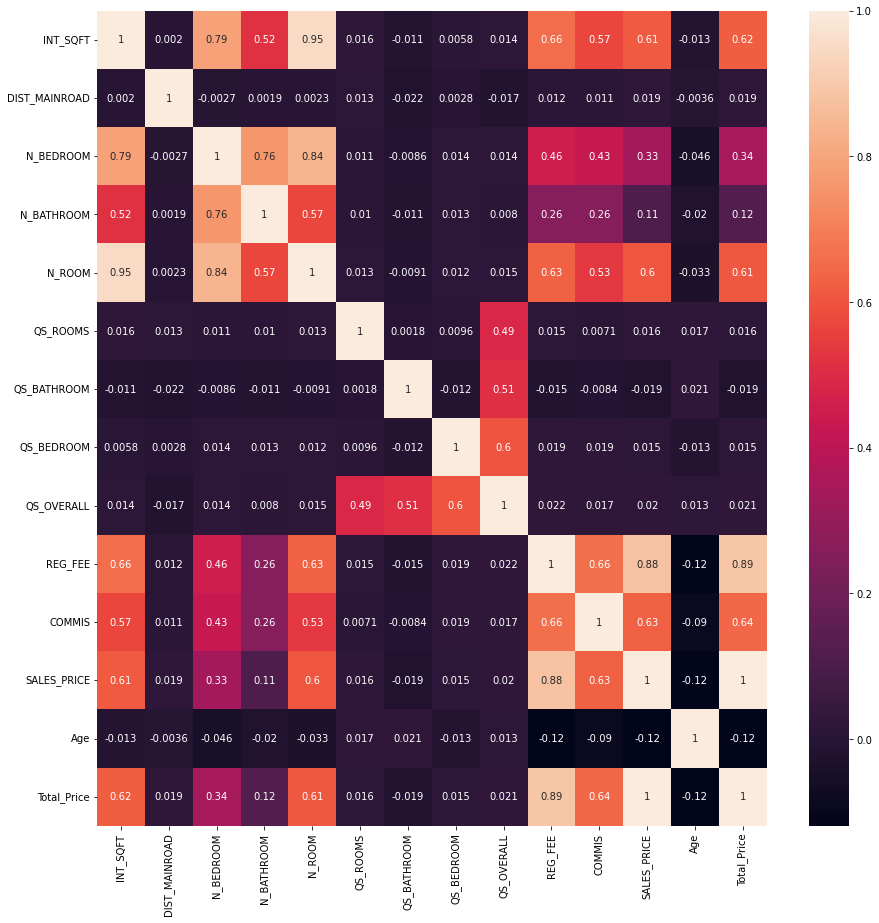

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

* We can see there is a high correlation between N_ROOM and other features dealing with price and other N_rooms. 
* A similar trend is seen in INT_SQFT.
* There is also high correlation between variables involving Price.
* We can conclude that there is high multicollinearity present which needs to be treated before building the final model.

In [97]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   INT_SQFT       7109 non-null   int64         
 1   DIST_MAINROAD  7109 non-null   int64         
 2   N_BEDROOM      7109 non-null   int32         
 3   N_BATHROOM     7109 non-null   int32         
 4   N_ROOM         7109 non-null   int64         
 5   QS_ROOMS       7109 non-null   int32         
 6   QS_BATHROOM    7109 non-null   int32         
 7   QS_BEDROOM     7109 non-null   int32         
 8   QS_OVERALL     7109 non-null   float64       
 9   REG_FEE        7109 non-null   int64         
 10  COMMIS         7109 non-null   int64         
 11  SALES_PRICE    7109 non-null   int64         
 12  PRT_ID         7109 non-null   object        
 13  AREA           7109 non-null   object        
 14  DATE_SALE      7109 non-null   datetime64[ns]
 15  SALE_COND      7109 n

In [98]:
# Checking for skewness
for i in df_final.select_dtypes(include=np.number).columns:
    print(i,':',df_final[i].skew())

INT_SQFT : 0.1312376307506204
DIST_MAINROAD : 0.01814383555951245
N_BEDROOM : 1.1620744779782093
N_BATHROOM : 1.401450649313029
N_ROOM : 0.11880076563010564
QS_ROOMS : 0.1426934683203334
QS_BATHROOM : 0.14020268982734005
QS_BEDROOM : 0.16811444742854692
QS_OVERALL : -0.00716238948050237
REG_FEE : 1.0377545610178516
COMMIS : 0.9516562164668685
SALES_PRICE : 0.7733433358864348
Age : 0.2663558245389803
Total_Price : 0.7791415794012426


* Few features have a high skewness which are not treated as the variables are not continuous but discrete numerical variables.
* The REG_FEE and COMMIS are not treated as they contribute towards the target variable Total_Price. Hence will be dropped before model building.

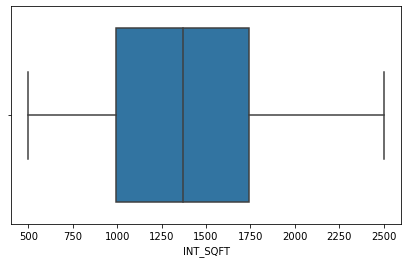

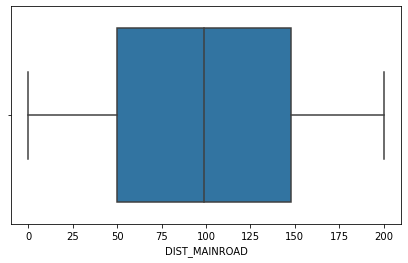

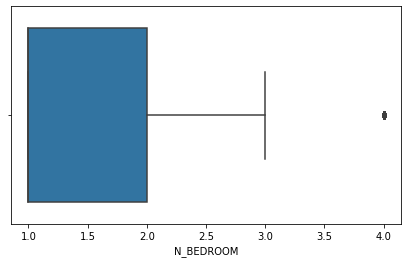

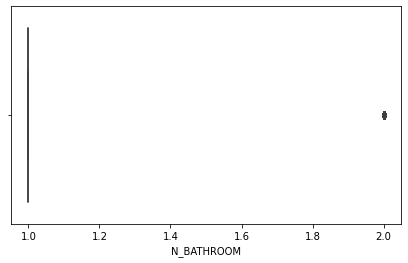

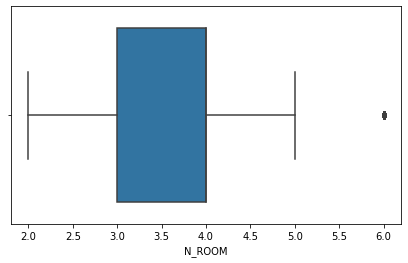

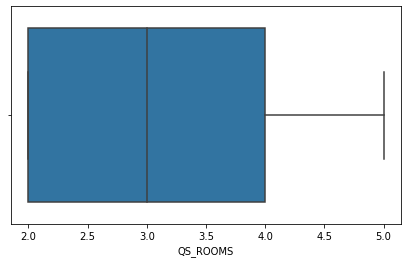

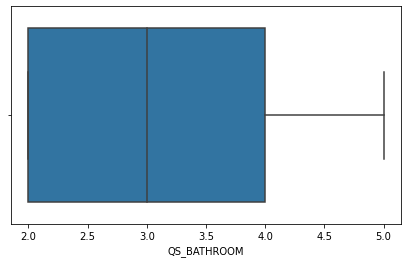

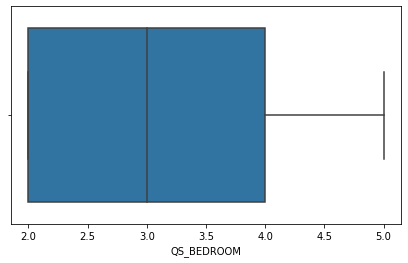

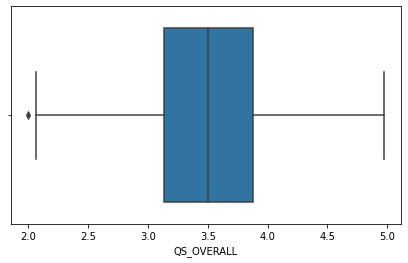

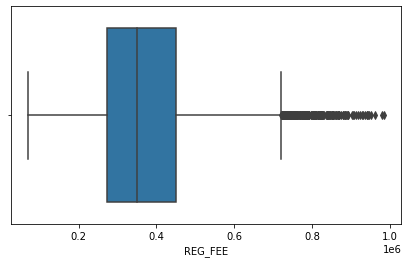

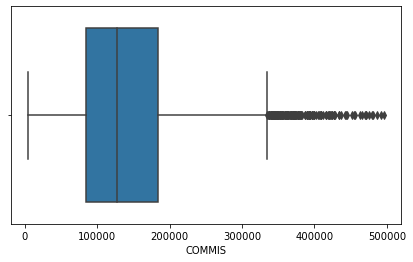

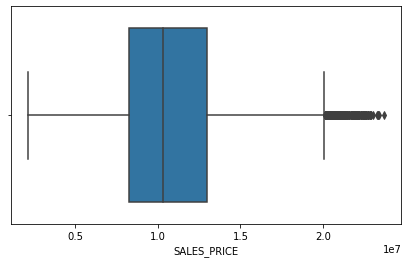

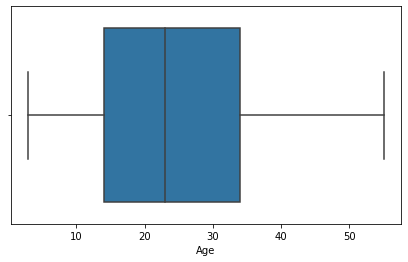

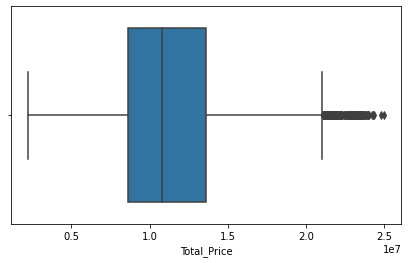

In [99]:
# Checking for Outliers
for i in df_final.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(df_final[i])
    plt.show()

* The rooms show the presence of outliers which are not treated as the variables are not continuous but discrete numerical variables.The range is not large hence left untouched.
* The REG_FEE and COMMIS are not treated as they contribute towards the target variable Total_Price. Hence will be dropped before model building.

In [100]:
df_final.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'Build_Year', 'Age', 'Total_Price', 'Range', 'sale_year'],
      dtype='object')

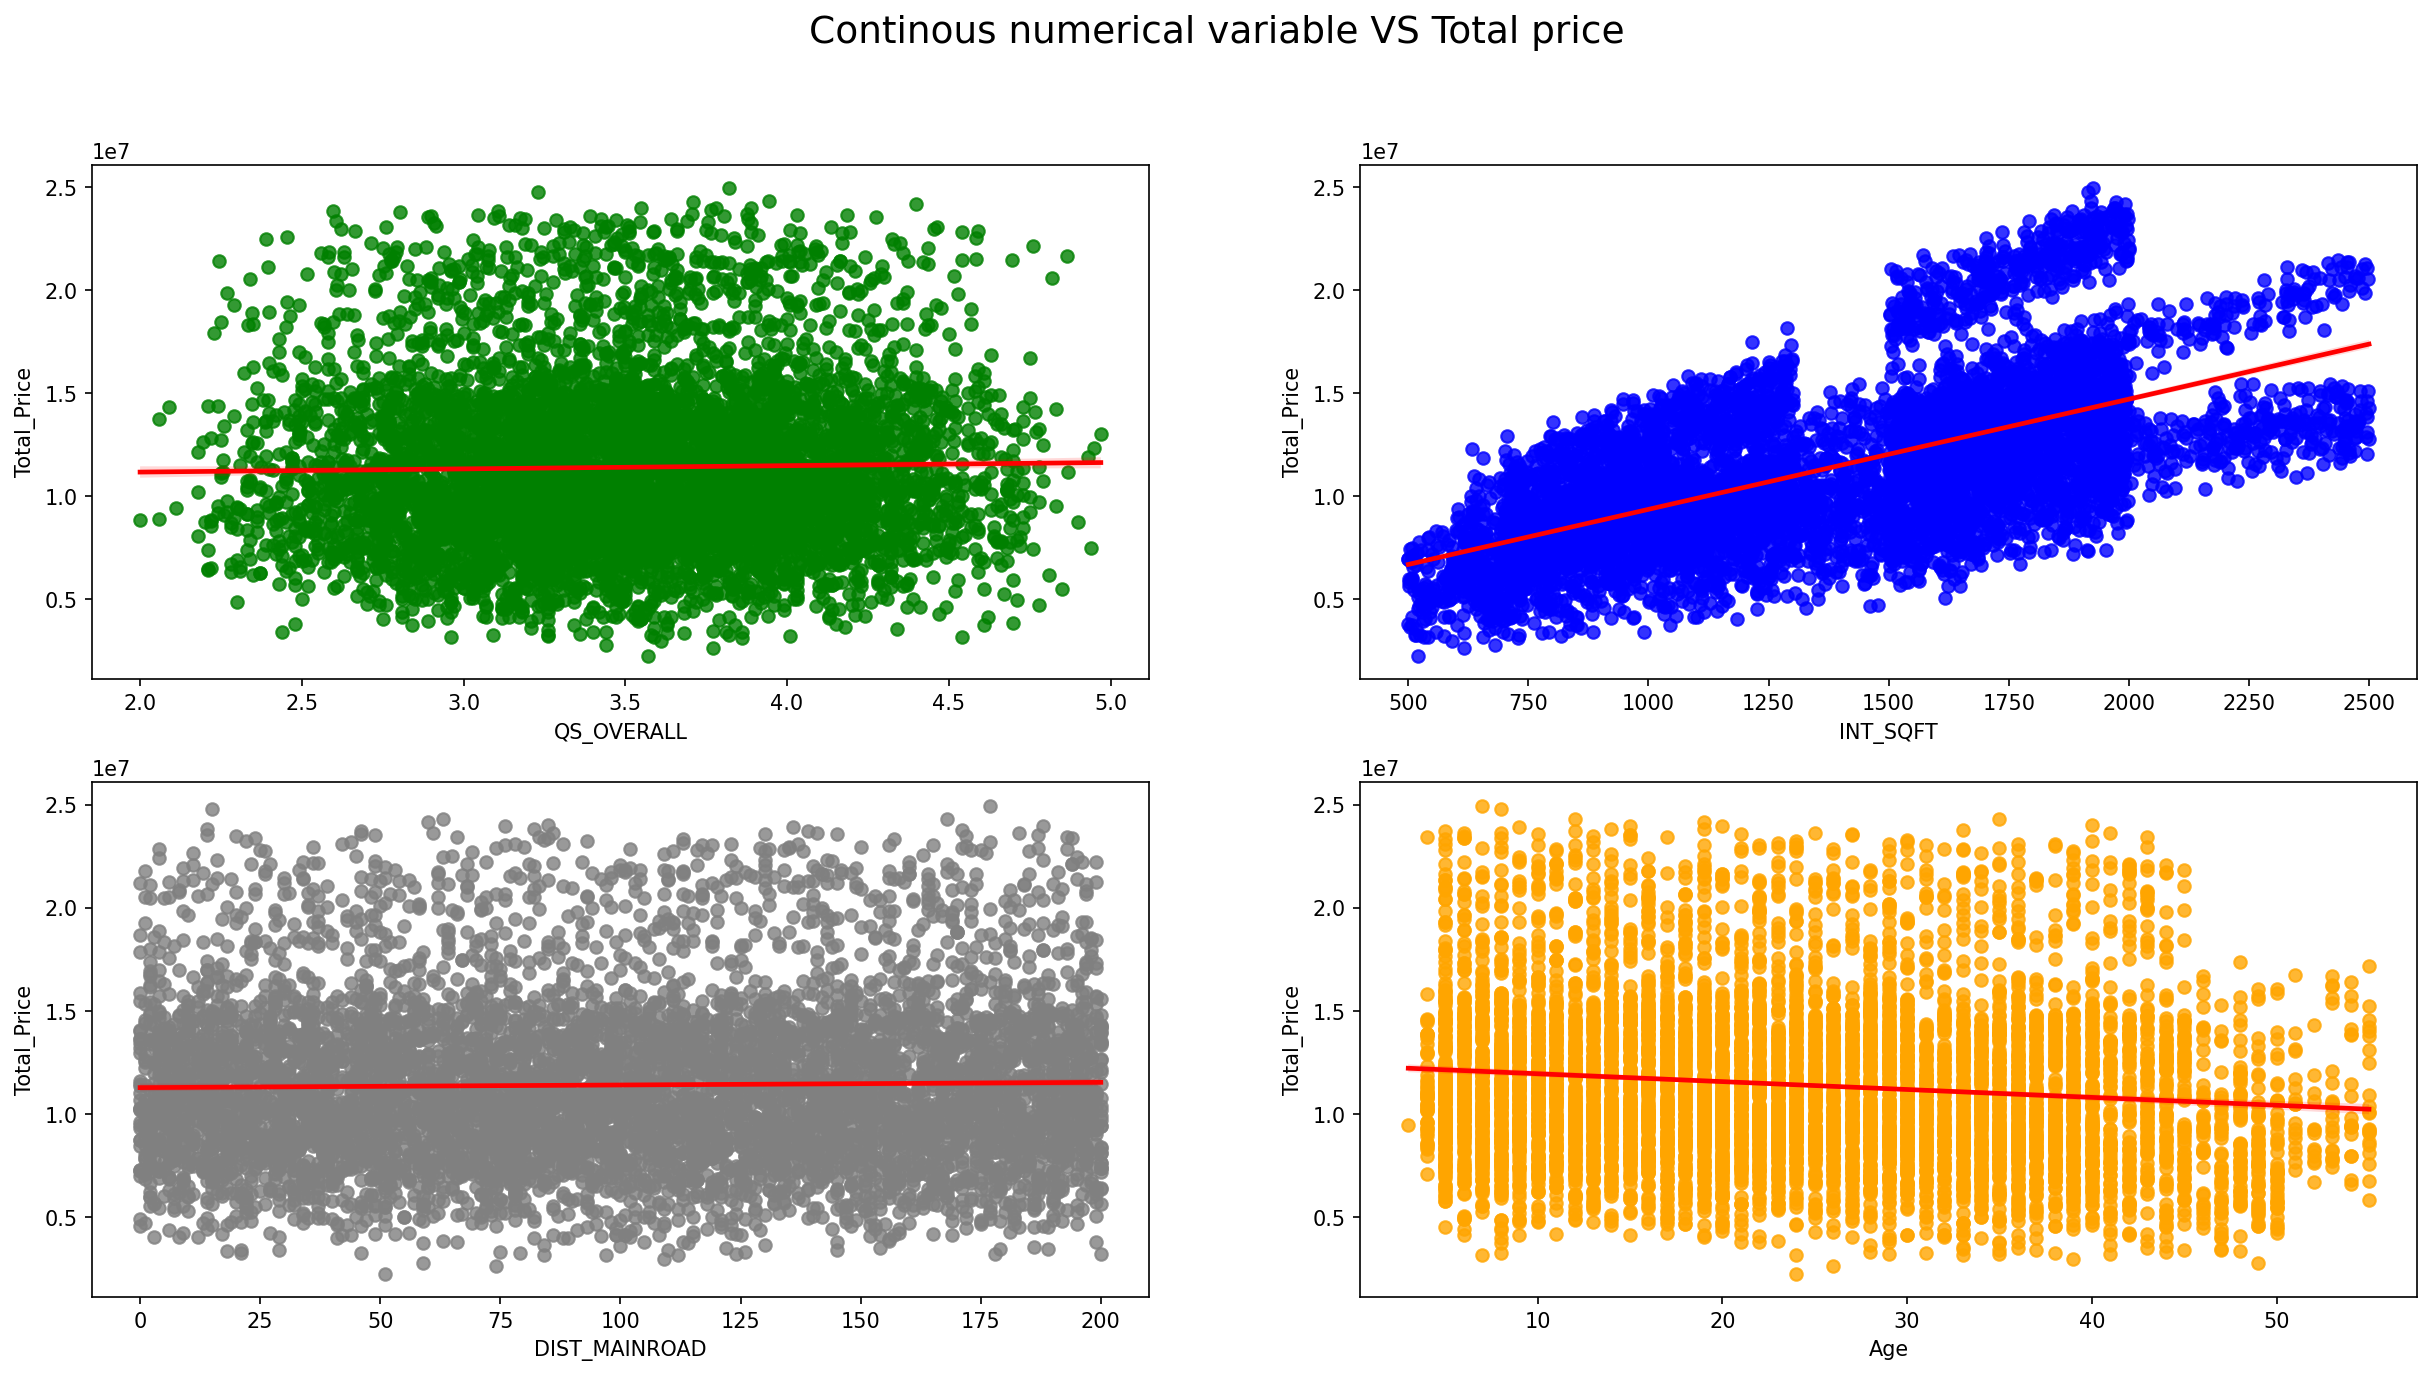

In [101]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df_final.QS_OVERALL, df_final.Total_Price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df_final.INT_SQFT, df_final.Total_Price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df_final.DIST_MAINROAD, df_final.Total_Price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df_final.Age, df_final.Total_Price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

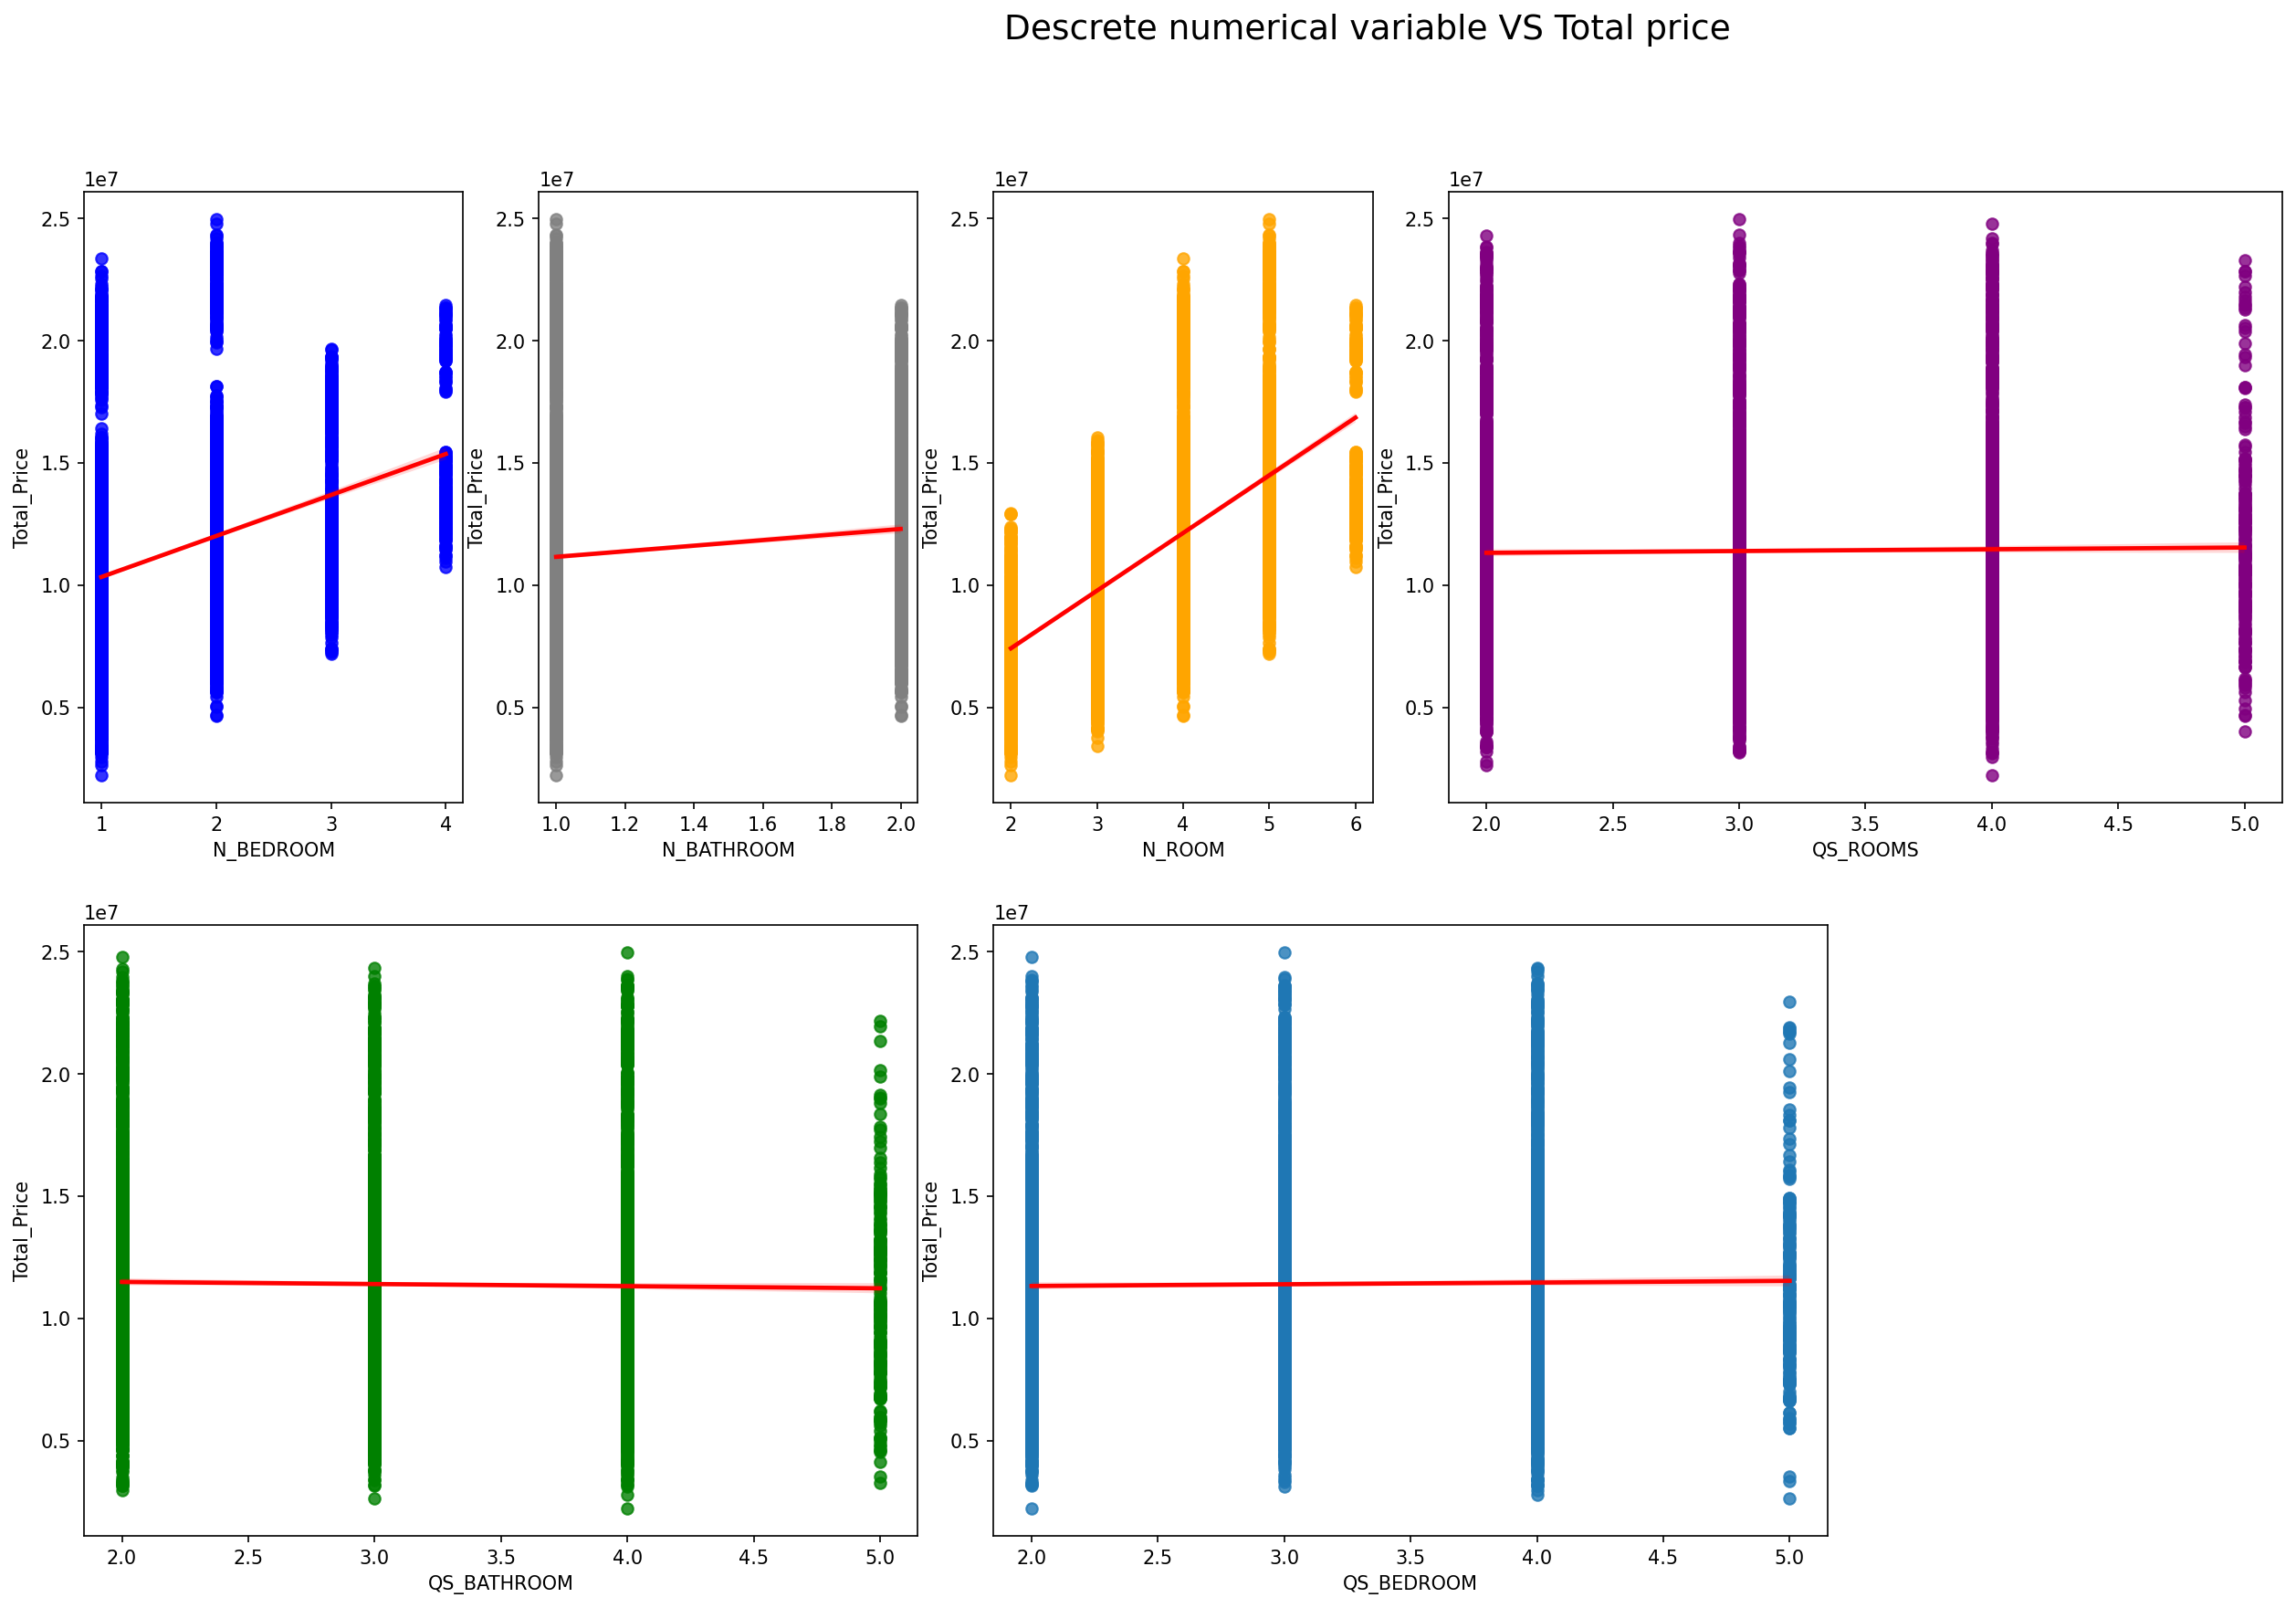

In [102]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df_final.N_BEDROOM, df_final.Total_Price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df_final.N_BATHROOM, df_final.Total_Price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df_final.N_ROOM, df_final.Total_Price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df_final.QS_ROOMS, df_final.Total_Price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df_final.QS_BATHROOM, df_final.Total_Price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df_final.QS_BEDROOM, df_final.Total_Price, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

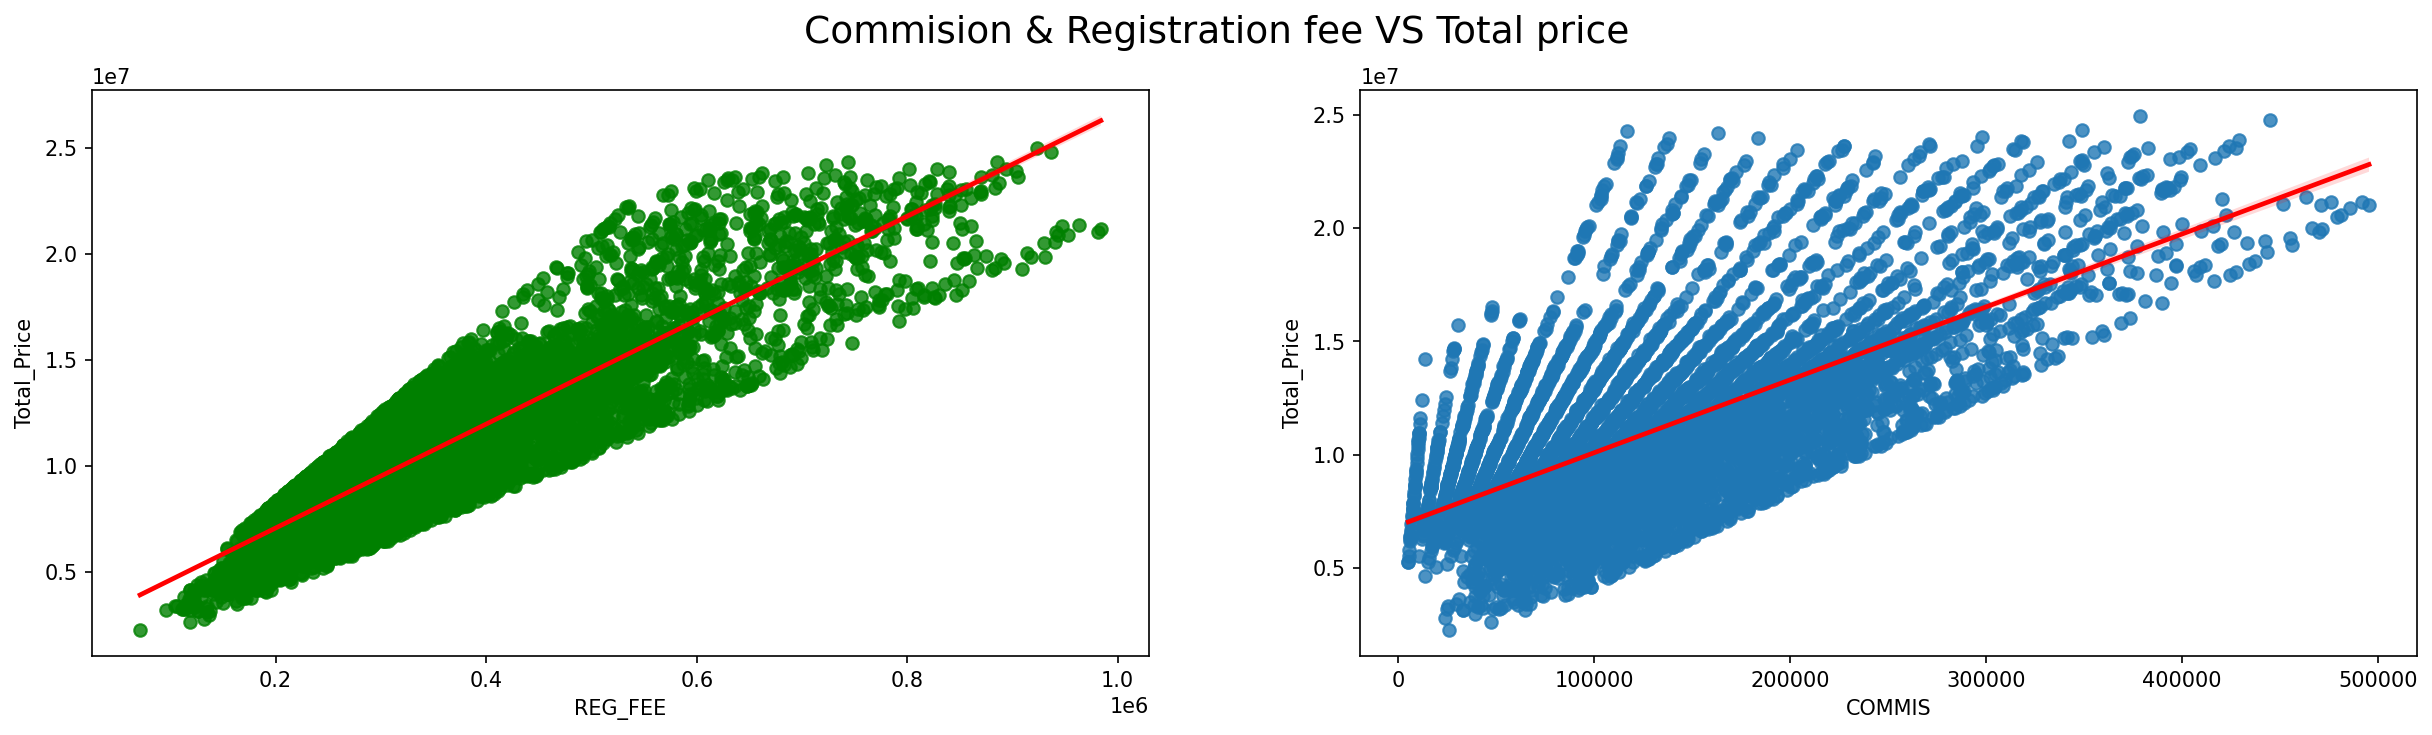

In [103]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(df_final.REG_FEE, df_final.Total_Price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(df_final.COMMIS, df_final.Total_Price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

In [104]:
df_final.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'Build_Year', 'Age', 'Total_Price', 'Range', 'sale_year'],
      dtype='object')

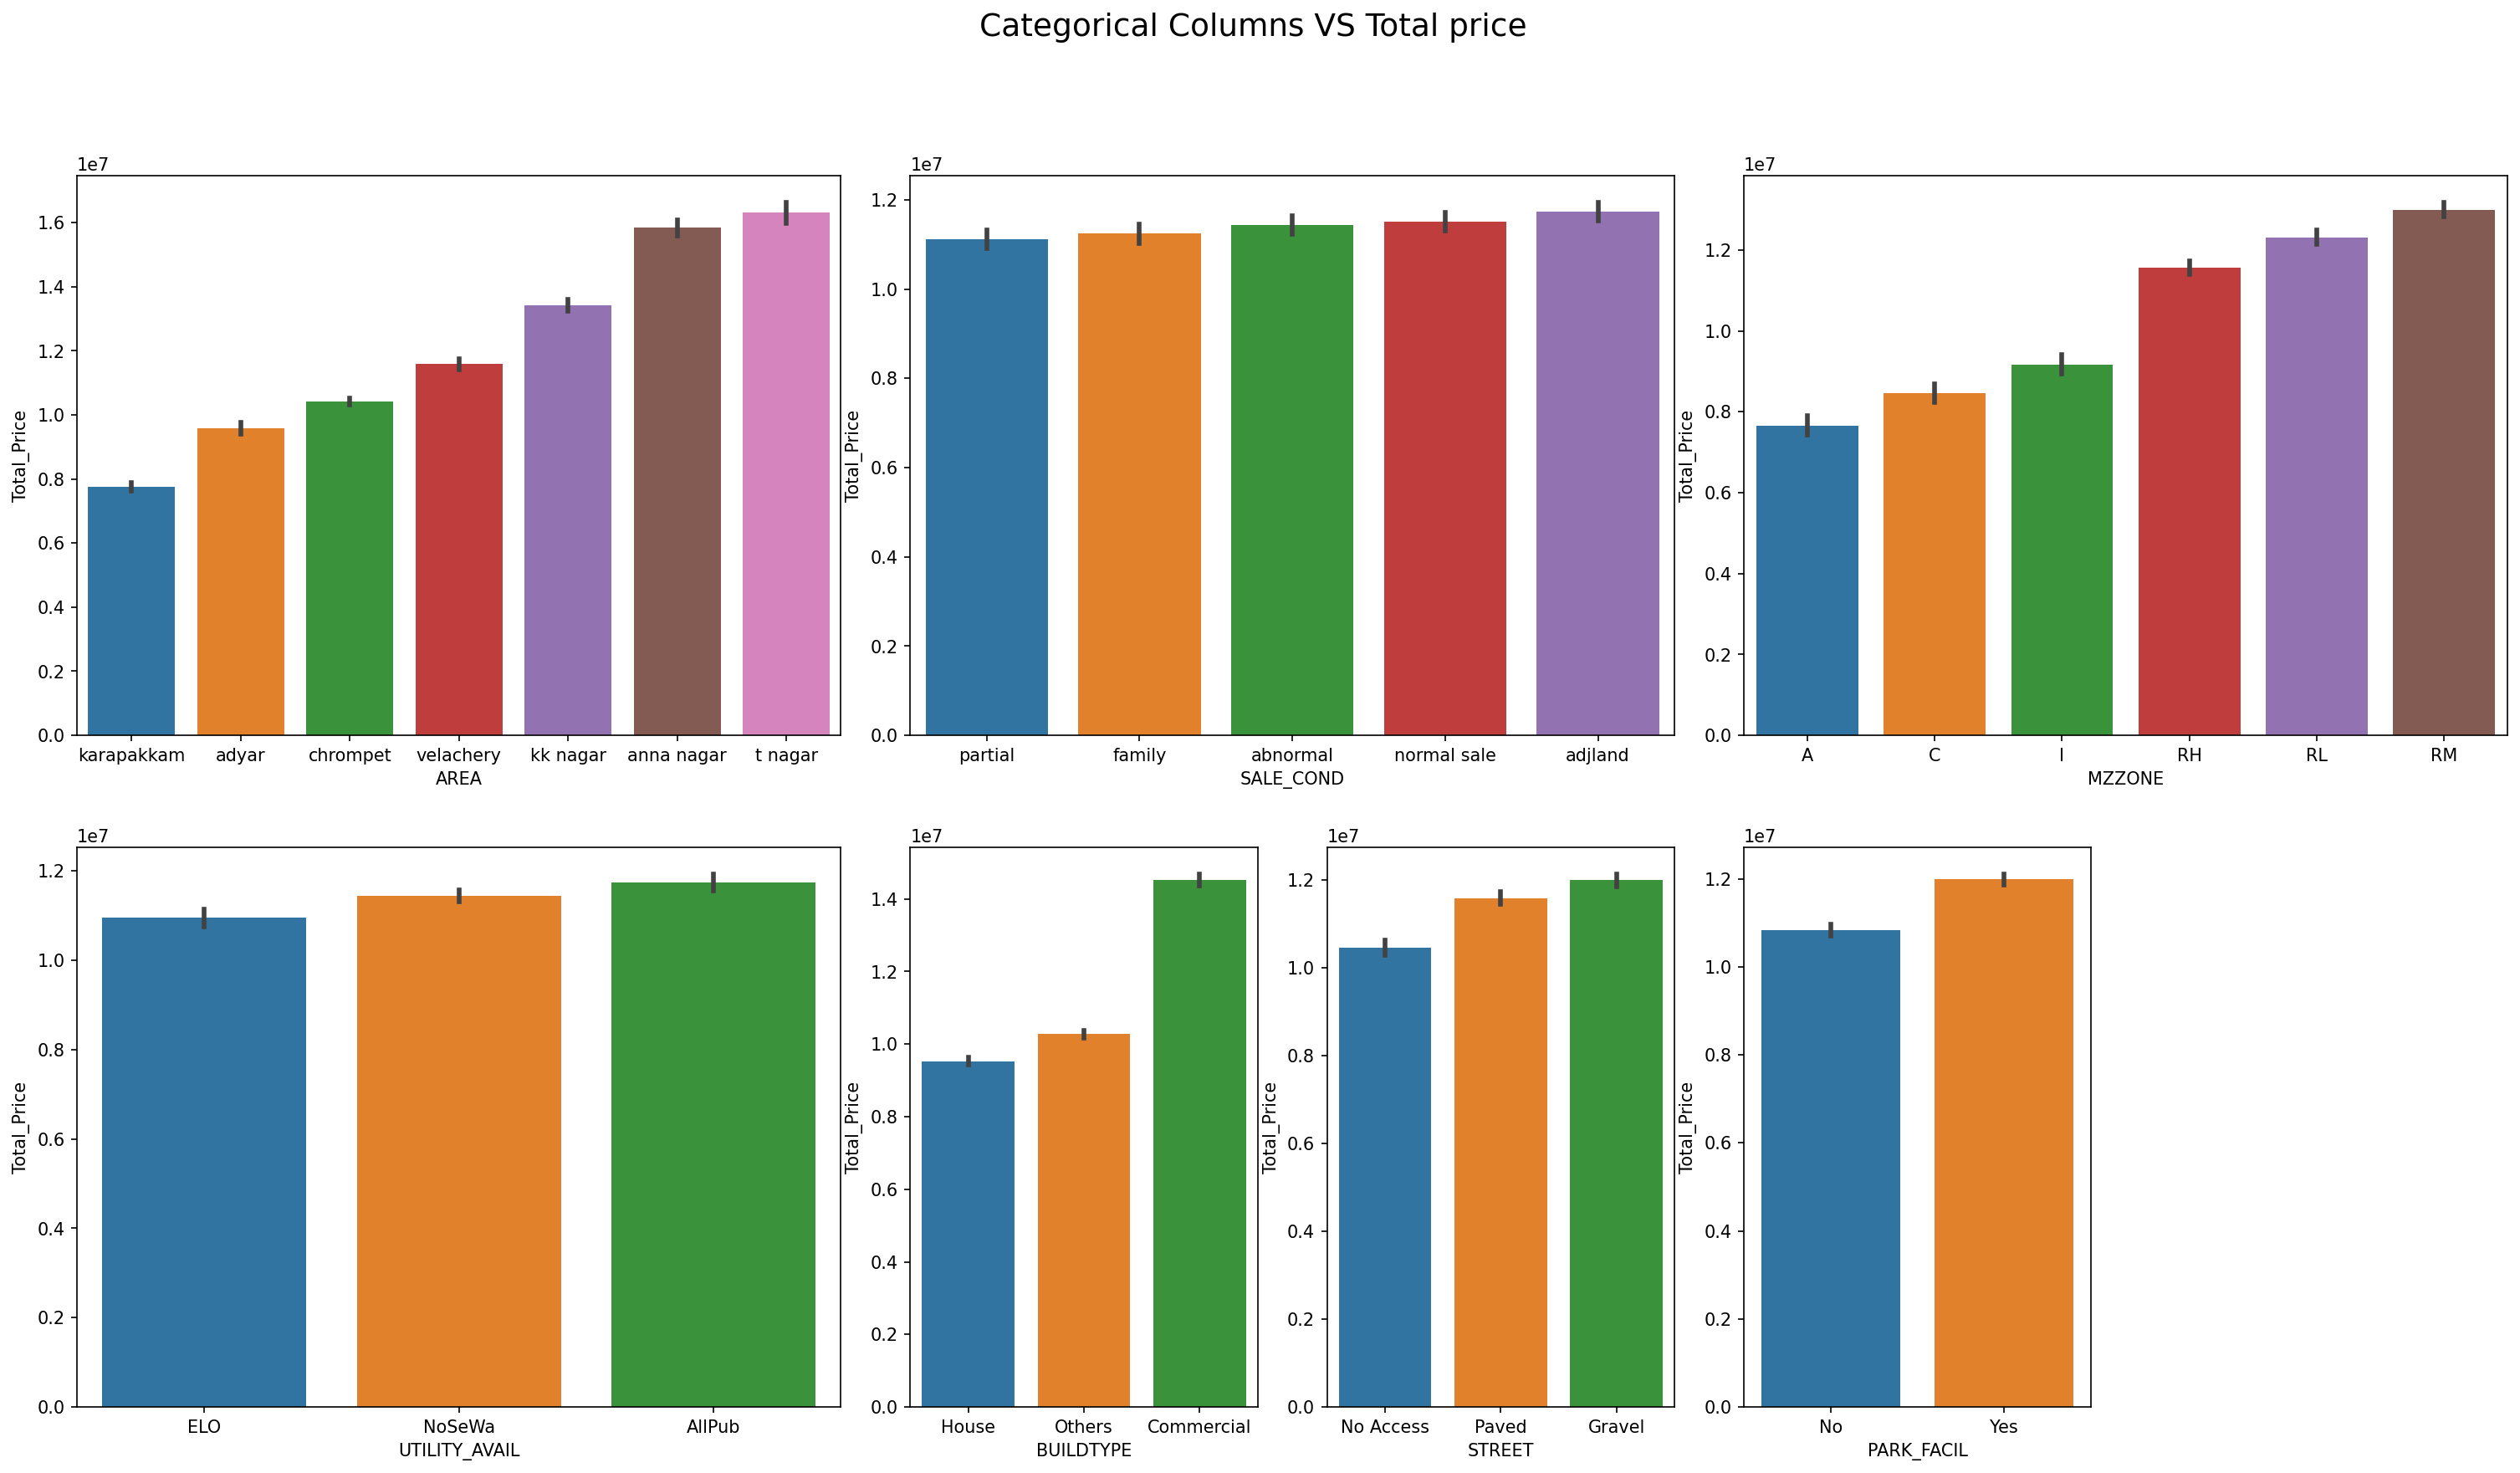

In [105]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df_final.AREA,y=df_final.Total_Price,order=df_final.groupby('AREA')['Total_Price'].mean().reset_index().sort_values('Total_Price')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df_final.SALE_COND,y=df_final.Total_Price,order=df_final.groupby('SALE_COND')['Total_Price'].mean().reset_index().sort_values('Total_Price')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df_final.MZZONE,y=df_final.Total_Price,order=df_final.groupby('MZZONE')['Total_Price'].mean().reset_index().sort_values('Total_Price')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df_final.UTILITY_AVAIL,y=df_final.Total_Price,order=df_final.groupby('UTILITY_AVAIL')['Total_Price'].mean().reset_index().sort_values('Total_Price')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df_final.BUILDTYPE,y=df_final.Total_Price,order=df_final.groupby('BUILDTYPE')['Total_Price'].mean().reset_index().sort_values('Total_Price')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df_final.STREET,y=df_final.Total_Price,order=df_final.groupby('STREET')['Total_Price'].mean().reset_index().sort_values('Total_Price')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df_final.PARK_FACIL,y=df_final.Total_Price,order=df_final.groupby('PARK_FACIL')['Total_Price'].mean().reset_index().sort_values('Total_Price')['PARK_FACIL'])

plt.suptitle("Categorical Columns VS Total price", fontsize=18)
plt.show()

In [106]:
df_final.groupby('AREA')['Total_Price'].mean().sort_values()

AREA
karapakkam    7755477.044656
adyar         9580581.171835
chrompet     10407998.354877
velachery    11588414.946993
kk nagar     13419332.342026
anna nagar   15844233.097716
t nagar      16322649.039920
Name: Total_Price, dtype: float64

In [107]:
df_final.select_dtypes(include='object').columns

Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'Build_Year', 'Range'],
      dtype='object')

In [108]:
df_final.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [109]:
df_final.Build_Year.value_counts()

1976 - 1990    2650
1991 - 2000    1814
<1975          1700
> 2001          945
Name: Build_Year, dtype: int64

In [110]:
df_final.UTILITY_AVAIL.value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [111]:
df_final.SALE_COND.value_counts()

adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: SALE_COND, dtype: int64

In [112]:
df_final.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [113]:
df_final.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [114]:
df_final.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

### Label Encoder

* Here we are encoding ordinal categorical columns which have a linear relation and some order present in them and we have to preserve the order so here we use Lebel/Ordinal encoder. We are mapping the values in order of the data for ease.

In [115]:
# Encoding the area column order-wise 
df_final.AREA = df_final.AREA.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
df_final.SALE_COND = df_final.SALE_COND.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
df_final.PARK_FACIL = df_final.PARK_FACIL.map({'Yes':1,
                                       'No':0})

# Encoding the BUILDTYPE column order-wise 
df_final.BUILDTYPE = df_final.BUILDTYPE.map({'House':1,
                                       'Others':2,
                                       'Commercial':3})

# Encoding the utility_avail column order-wise 
df_final.UTILITY_AVAIL = df_final.UTILITY_AVAIL.map({'ELO' : 1, 
                                             'NoSeWa' : 2, 
                                             'AllPub' : 3})
                                          
# Encoding the street column order-wise 
df_final.STREET = df_final.STREET.map({'No Access' : 1,
                               'Paved' : 2, 
                               'Gravel' : 3})


# Encoding the mzzone column order-wise 
df_final.MZZONE = df_final.MZZONE.map({'A' : 1,
                               'C' : 2,
                               'I' : 3,
                               'RL' : 5,
                               'RH' : 4,
                               'RM' : 6})

# Encoding the Build_Year column order-wise 
df_final.Build_Year = df_final.Build_Year.map({'<1975' : 1,
                               '1976 - 1990' : 2,
                               '1991 - 2000' : 3,
                               '> 2001' : 4})

In [116]:
df_final.head()

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131          1           1       3         4   
1      1986             26          2           1       5         4   
2       909             70          1           1       3         4   
3      1855             14          3           2       5         4   
4      1226             84          1           1       3         3   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  PRT_ID  \
0            3           4    4.330000   380000  144400      7600000  P03210   
1            4           2    3.765000   760122  304049     21717770  P09411   
2            3           2    3.090000   421094   92114     13159200  P01812   
3            3           3    4.010000   356321   77042      9630290  P05346   
4            2           4    3.290000   237000   74063      7406250  P06210   

   AREA  DATE_SALE  SALE_COND  PARK_FACIL DATE_BUILD  BUILDTYPE  \
0     1 2011-05-04          3           1 1967-05-15          3   
1     6 2006-12-19          3           0 1995-12-22          3   
2     2 2012-02-04          3           1 1992-02-09          3   
3     4 2010-03-13          2           0 1988-03-18          2   
4     1 2009-10-05          3           1 1979-10-13          2   

   UTILITY_AVAIL  STREET  MZZONE  Build_Year  Age  Total_Price       Range  \
0              3       2       1           1   44      8124400  Affordable   
1              3       3       4           3   11     22781941      Luxury   
2              1       3       5           3   20     13672408     Premium   
3              2       2       3           2   22     10063653   Mid Range   
4              3       3       2           2   30      7717313  Affordable   

  sale_year  
0      2011  
1      2006  
2      2012  
3      2010  
4      2009

In [117]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   INT_SQFT       7109 non-null   int64         
 1   DIST_MAINROAD  7109 non-null   int64         
 2   N_BEDROOM      7109 non-null   int32         
 3   N_BATHROOM     7109 non-null   int32         
 4   N_ROOM         7109 non-null   int64         
 5   QS_ROOMS       7109 non-null   int32         
 6   QS_BATHROOM    7109 non-null   int32         
 7   QS_BEDROOM     7109 non-null   int32         
 8   QS_OVERALL     7109 non-null   float64       
 9   REG_FEE        7109 non-null   int64         
 10  COMMIS         7109 non-null   int64         
 11  SALES_PRICE    7109 non-null   int64         
 12  PRT_ID         7109 non-null   object        
 13  AREA           7109 non-null   int64         
 14  DATE_SALE      7109 non-null   datetime64[ns]
 15  SALE_COND      7109 n

In [118]:
df_final.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'Build_Year', 'Age', 'Total_Price', 'Range', 'sale_year'],
      dtype='object')

In [119]:
# Removing unnecessary features thich has negligible relation with total_price
dfm = df_final.copy()
dfm.drop(['DIST_MAINROAD', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'QS_ROOMS', 'REG_FEE','COMMIS','Range','PRT_ID','sale_year','Age','DATE_SALE','DATE_BUILD'], axis=1, inplace=True)

* DIST_MAINROAD, QS_BATHROOM , QS_BEDROOM , QS_OVERALL , QS_ROOMS has no correlation with the total price.
* PRT_ID has all the data as unique values. WWe drop it as we cannot infer anything insightful from the data.
* REG_FEE , COMMIS contributed towards the Total Price. Hence they are dropped.
* Range is a categorical data created from the total price. Hence we drop it as it doesn't predict the price.
* sale_year , Age , DATE_SALE , DATE_BUILD are being dropped as we have a Build_Year from which the property age can be calculated. They all represent the same data hence removed.


In [120]:
dfm.head()

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  SALES_PRICE  AREA  SALE_COND  \
0      1004          1           1       3      7600000     1          3   
1      1986          2           1       5     21717770     6          3   
2       909          1           1       3     13159200     2          3   
3      1855          3           2       5      9630290     4          2   
4      1226          1           1       3      7406250     1          3   

   PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  Build_Year  \
0           1          3              3       2       1           1   
1           0          3              3       3       4           3   
2           1          3              1       3       5           3   
3           0          2              2       2       3           2   
4           1          2              3       3       2           2   

   Total_Price  
0      8124400  
1     22781941  
2     13672408  
3     10063653  
4      7717313

In [121]:
X = dfm.drop(['SALES_PRICE','Total_Price'],axis=1) # Independent Variable(s)
Y = dfm['Total_Price'] # Target Variable

In [122]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

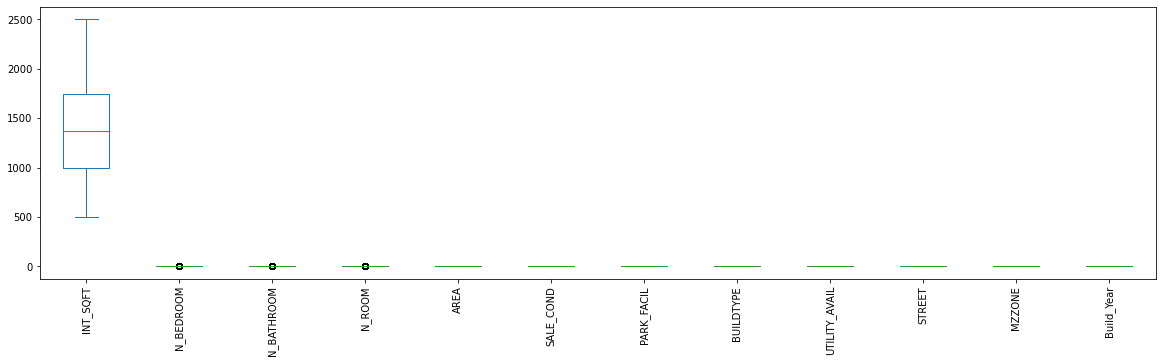

In [123]:
Xtrain.plot.box(figsize=(20,5), rot=90)
plt.show()

In [124]:
MMS = MinMaxScaler() # We are scalling the data as we can clearly see that the INT_SQFT is in a different scale.

In [125]:
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)

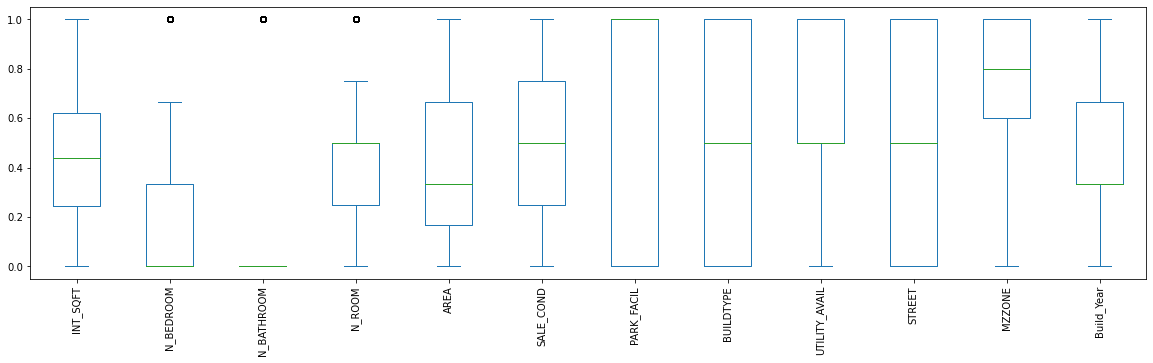

In [126]:
Xtr.plot.box(figsize=(20,5), rot=90)
plt.show()

In [127]:
# Base Model scalled

X = dfm.drop(['SALES_PRICE','Total_Price'],axis=1)
Y = dfm['Total_Price']

Xc = sm.add_constant(Xtr)
model = sm.OLS(Ytrain,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:31:32   Log-Likelihood:                -88363.
No. Observations:                5687   AIC:                         1.768e+05
Df Residuals:                    5674   BIC:                         1.768e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.129e+05    8.1e+04      2.627      0.009     5.4e+04    3.72e+05
INT_SQFT       3.384e+06   2.76e+05     12.265      0.000    2.84e+06    3.93e+06
N_BEDROOM     -4.844e+06   1.63e+05    -29.696      0.000   -5.16e+06   -4.52e+06
N_BATHROOM     3.551e+05   7.88e+04      4.504      0.000    2.01e+05     5.1e+05
N_ROOM         6.844e+06   2.75e+05     24.911      0.000    6.31e+06    7.38e+06
AREA           3.576e+06   1.16e+05     30.876      0.000    3.35e+06     3.8e+06
SALE_COND      6.949e+05   5.05e+04     13.756      0.000    5.96e+05    7.94e+05
PARK_FACIL       1.1e+06    3.6e+04     30.555      0.000    1.03e+06    1.17e+06
BUILDTYPE      4.839e+06   4.39e+04    110.196      0.000    4.75e+06    4.93e+06
UTILITY_AVAIL  1.947e+05   5.23e+04      3.724      0.000    9.22e+04    2.97e+05
STREET         1.031e+06   4.55e+04     22.654      0.000    9.42e+05    1.12e+06
MZZONE         3.084e+06   6.53e+04     47.226      0.000    2.96e+06    3.21e+06
Build_Year     6.362e+05   5.61e+04     11.346      0.000    5.26e+05    7.46e+05
==============================================================================
Omnibus:                      269.460   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.790
Skew:                           0.562   Prob(JB):                     1.46e-67
Kurtosis:                       3.193   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
y_pred_train = model.predict(Xc)
mse_train = mean_squared_error(Ytrain,y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_train

1354175.5002343922

In [129]:
Xte = pd.DataFrame(MMS.transform(Xtest),columns = Xtest.columns, index = Xtest.index)
xt = sm.add_constant(Xte)
y_pred_test = model.predict(xt)
mse_test = mean_squared_error(Ytest,y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

1322623.2168893497

In [130]:
np.sum(model.resid)

3.590434789657593e-05

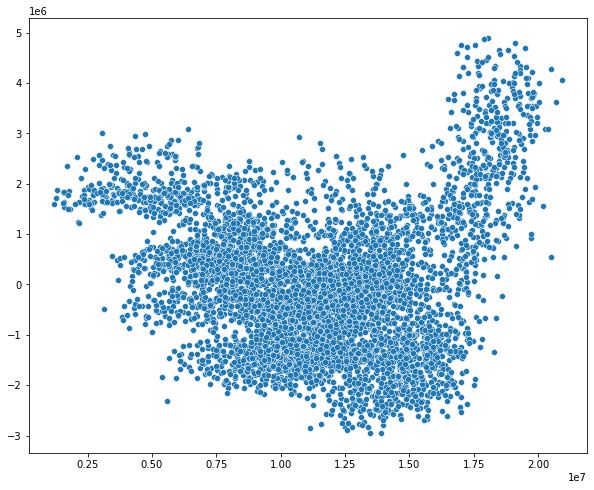

In [131]:
sns.scatterplot(model.fittedvalues, model.resid)
plt.show()

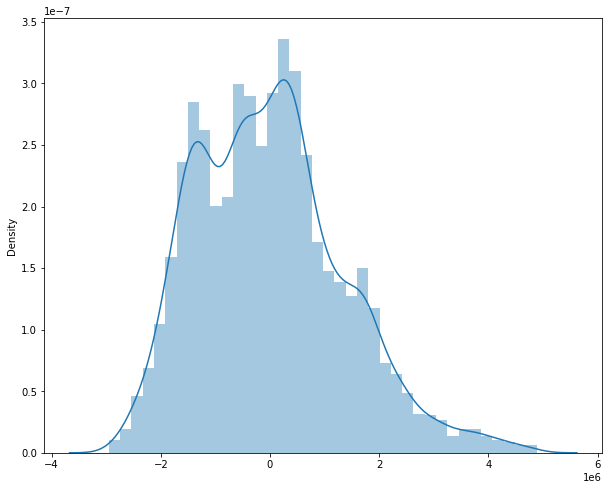

In [132]:
sns.distplot(model.resid)
plt.show()

In [133]:
model.resid.skew()

0.5617974412153804

* From the above model summary, we cn see a good Rsquared score with no change in the Adj_Rsquared score.
* The RMSE of train and Test shows a very minimal variance error.
* The durbin watson score shows there is no Auto correlation as its within range.
* The variance in residual shows a moderate Homoscedasticity.
* The residue forms a  near normal distribution.
* The CN No. is below 1000 which shows there is no multicollinearity.
* The pvalues are below the level of significance.
* We can conclude the model to be a good fit model.

* But from the correlation matrix we found multicollinearity, hence we proceed with the vif to check for significant features before building the final model.

In [149]:
# Base Model - Scaled

X = dfm.drop(['SALES_PRICE','Total_Price'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:32:07   Log-Likelihood:                -88363.
No. Observations:                5687   AIC:                         1.768e+05
Df Residuals:                    5674   BIC:                         1.768e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.129e+05    8.1e+04      2.627      0.009     5.4e+04    3.72e+05
INT_SQFT       3.384e+06   2.76e+05     12.265      0.000    2.84e+06    3.93e+06
N_BEDROOM     -4.844e+06   1.63e+05    -29.696      0.000   -5.16e+06   -4.52e+06
N_BATHROOM     3.551e+05   7.88e+04      4.504      0.000    2.01e+05     5.1e+05
N_ROOM         6.844e+06   2.75e+05     24.911      0.000    6.31e+06    7.38e+06
AREA           3.576e+06   1.16e+05     30.876      0.000    3.35e+06     3.8e+06
SALE_COND      6.949e+05   5.05e+04     13.756      0.000    5.96e+05    7.94e+05
PARK_FACIL       1.1e+06    3.6e+04     30.555      0.000    1.03e+06    1.17e+06
BUILDTYPE      4.839e+06   4.39e+04    110.196      0.000    4.75e+06    4.93e+06
UTILITY_AVAIL  1.947e+05   5.23e+04      3.724      0.000    9.22e+04    2.97e+05
STREET         1.031e+06   4.55e+04     22.654      0.000    9.42e+05    1.12e+06
MZZONE         3.084e+06   6.53e+04     47.226      0.000    2.96e+06    3.21e+06
Build_Year     6.362e+05   5.61e+04     11.346      0.000    5.26e+05    7.46e+05
==============================================================================
Omnibus:                      269.460   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.790
Skew:                           0.562   Prob(JB):                     1.46e-67
Kurtosis:                       3.193   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
y_pred_train = m1.predict(Xc)
mse_train = mean_squared_error(Ytrain,y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_train

1354175.5002343922

In [136]:
Xte = pd.DataFrame(MMS.transform(Xtest),columns = Xtest.columns, index = Xtest.index)
xt = sm.add_constant(Xte)
y_pred_test = m1.predict(xt)
mse_test = mean_squared_error(Ytest,y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

1322623.2168893497

In [137]:
# VIF values

X = dfm.drop(['SALES_PRICE','Total_Price'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors       Features
0  122.585956       INT_SQFT
1   24.054813      N_BEDROOM
2   29.008323     N_BATHROOM
3  180.100079         N_ROOM
4   17.789146           AREA
5    5.072034      SALE_COND
6    1.985066     PARK_FACIL
7    6.270361      BUILDTYPE
8    8.718917  UTILITY_AVAIL
9    7.181615         STREET
10  10.228388         MZZONE
11   6.219062     Build_Year

In [150]:
# N_ROOM has a high vif score. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     3407.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:32:21   Log-Likelihood:                -88658.
No. Observations:                5687   AIC:                         1.773e+05
Df Residuals:                    5675   BIC:                         1.774e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.751e+05   8.53e+04      3.226      0.001    1.08e+05    4.42e+05
INT_SQFT       8.131e+06    2.1e+05     38.680      0.000    7.72e+06    8.54e+06
N_BEDROOM     -3.053e+06   1.54e+05    -19.798      0.000   -3.35e+06   -2.75e+06
N_BATHROOM     5.644e+05   8.26e+04      6.837      0.000    4.03e+05    7.26e+05
AREA           4.298e+06   1.18e+05     36.400      0.000    4.07e+06    4.53e+06
SALE_COND      6.841e+05   5.32e+04     12.858      0.000     5.8e+05    7.88e+05
PARK_FACIL     1.092e+06   3.79e+04     28.820      0.000    1.02e+06    1.17e+06
BUILDTYPE      4.847e+06   4.63e+04    104.793      0.000    4.76e+06    4.94e+06
UTILITY_AVAIL   1.28e+05    5.5e+04      2.327      0.020    2.02e+04    2.36e+05
STREET         9.708e+05   4.79e+04     20.284      0.000    8.77e+05    1.06e+06
MZZONE         3.193e+06   6.86e+04     46.533      0.000    3.06e+06    3.33e+06
Build_Year     6.434e+05    5.9e+04     10.896      0.000    5.28e+05    7.59e+05
==============================================================================
Omnibus:                      335.075   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.242
Skew:                           0.602   Prob(JB):                     2.74e-88
Kurtosis:                       3.504   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# VIF values

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors       Features
0  60.498723       INT_SQFT
1  21.622454      N_BEDROOM
2  27.333554     N_BATHROOM
3  16.974854           AREA
4   5.015126      SALE_COND
5   1.979993     PARK_FACIL
6   6.142577      BUILDTYPE
7   8.627044  UTILITY_AVAIL
8   7.129638         STREET
9   9.824837         MZZONE
10  6.127891     Build_Year

In [152]:
# INT_SQFT has a high vif score. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2848.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:32:43   Log-Likelihood:                -89323.
No. Observations:                5687   AIC:                         1.787e+05
Df Residuals:                    5676   BIC:                         1.787e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.872e+06   8.39e+04     22.325      0.000    1.71e+06    2.04e+06
N_BEDROOM      2.017e+05   1.45e+05      1.389      0.165    -8.3e+04    4.86e+05
N_BATHROOM     1.412e+06   8.95e+04     15.783      0.000    1.24e+06    1.59e+06
AREA           7.744e+06   8.71e+04     88.915      0.000    7.57e+06    7.91e+06
SALE_COND      6.853e+05   5.98e+04     11.459      0.000    5.68e+05    8.02e+05
PARK_FACIL      1.13e+06   4.26e+04     26.520      0.000    1.05e+06    1.21e+06
BUILDTYPE      4.874e+06    5.2e+04     93.762      0.000    4.77e+06    4.98e+06
UTILITY_AVAIL  1.103e+05   6.18e+04      1.786      0.074   -1.08e+04    2.31e+05
STREET         9.032e+05   5.38e+04     16.800      0.000    7.98e+05    1.01e+06
MZZONE         2.821e+06   7.64e+04     36.939      0.000    2.67e+06    2.97e+06
Build_Year     4.428e+05   6.61e+04      6.697      0.000    3.13e+05    5.72e+05
==============================================================================
Omnibus:                      210.762   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.915
Skew:                           0.439   Prob(JB):                     8.89e-55
Kurtosis:                       3.529   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# VIF values

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors       Features
0 16.053790      N_BEDROOM
1 23.375267     N_BATHROOM
2  7.067039           AREA
3  4.984492      SALE_COND
4  1.973915     PARK_FACIL
5  6.075368      BUILDTYPE
6  8.564575  UTILITY_AVAIL
7  7.111039         STREET
8  9.772719         MZZONE
9  6.125172     Build_Year

In [154]:
# N_BATHROOM has a high vif score. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3005.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:33:08   Log-Likelihood:                -89445.
No. Observations:                5687   AIC:                         1.789e+05
Df Residuals:                    5677   BIC:                         1.790e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.017e+06   8.52e+04     23.678      0.000    1.85e+06    2.18e+06
N_BEDROOM      2.065e+06   8.65e+04     23.878      0.000     1.9e+06    2.23e+06
AREA           7.128e+06   7.96e+04     89.604      0.000    6.97e+06    7.28e+06
SALE_COND      6.917e+05   6.11e+04     11.322      0.000    5.72e+05    8.11e+05
PARK_FACIL      1.13e+06   4.35e+04     25.963      0.000    1.04e+06    1.22e+06
BUILDTYPE      4.862e+06   5.31e+04     91.571      0.000    4.76e+06    4.97e+06
UTILITY_AVAIL  1.052e+05   6.31e+04      1.667      0.096   -1.86e+04    2.29e+05
STREET          8.96e+05   5.49e+04     16.315      0.000    7.88e+05       1e+06
MZZONE          2.87e+06    7.8e+04     36.813      0.000    2.72e+06    3.02e+06
Build_Year     4.465e+05   6.75e+04      6.611      0.000    3.14e+05    5.79e+05
==============================================================================
Omnibus:                      150.956   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.415
Skew:                           0.398   Prob(JB):                     3.27e-36
Kurtosis:                       3.239   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Since all the vif factors are below 10. We can start dropping features based on pvalue. The variables with multicollinearity found in the correlation matrix have been dropped.

In [157]:
# UTILITY_AVAIL has a high vif score. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors    Features
0 5.502786   N_BEDROOM
1 5.931774        AREA
2 4.734441   SALE_COND
3 1.960110  PARK_FACIL
4 5.657113   BUILDTYPE
5 6.678342      STREET
6 9.091011      MZZONE
7 5.812079  Build_Year

In [158]:
# UTILITY_AVAIL has a high pvalue. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3380.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:40:00   Log-Likelihood:                -89447.
No. Observations:                5687   AIC:                         1.789e+05
Df Residuals:                    5678   BIC:                         1.790e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.065e+06   8.01e+04     25.781      0.000    1.91e+06    2.22e+06
N_BEDROOM   2.074e+06   8.63e+04     24.025      0.000     1.9e+06    2.24e+06
AREA        7.131e+06   7.96e+04     89.632      0.000    6.97e+06    7.29e+06
SALE_COND   6.908e+05   6.11e+04     11.306      0.000    5.71e+05    8.11e+05
PARK_FACIL  1.128e+06   4.35e+04     25.925      0.000    1.04e+06    1.21e+06
BUILDTYPE   4.864e+06   5.31e+04     91.627      0.000    4.76e+06    4.97e+06
STREET      8.991e+05   5.49e+04     16.377      0.000    7.91e+05    1.01e+06
MZZONE      2.872e+06    7.8e+04     36.838      0.000    2.72e+06    3.02e+06
Build_Year  4.501e+05   6.75e+04      6.666      0.000    3.18e+05    5.82e+05
==============================================================================
Omnibus:                      150.718   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.072
Skew:                           0.398   Prob(JB):                     3.88e-36
Kurtosis:                       3.235   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors    Features
0 5.502786   N_BEDROOM
1 5.931774        AREA
2 4.734441   SALE_COND
3 1.960110  PARK_FACIL
4 5.657113   BUILDTYPE
5 6.678342      STREET
6 9.091011      MZZONE
7 5.812079  Build_Year

In [173]:
# MZZONE has a high vif score. So, we are dropping the feature.

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL','MZZONE'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2961.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:01:52   Log-Likelihood:                -90056.
No. Observations:                5687   AIC:                         1.801e+05
Df Residuals:                    5679   BIC:                         1.802e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.486e+06   7.81e+04     44.621      0.000    3.33e+06    3.64e+06
N_BEDROOM   1.844e+06   9.58e+04     19.250      0.000    1.66e+06    2.03e+06
AREA        8.143e+06   8.31e+04     97.997      0.000    7.98e+06    8.31e+06
SALE_COND    6.84e+05    6.8e+04     10.058      0.000    5.51e+05    8.17e+05
PARK_FACIL  1.104e+06   4.84e+04     22.807      0.000    1.01e+06     1.2e+06
BUILDTYPE    4.85e+06   5.91e+04     82.073      0.000    4.73e+06    4.97e+06
STREET      9.563e+05   6.11e+04     15.658      0.000    8.37e+05    1.08e+06
Build_Year  6.808e+05   7.48e+04      9.099      0.000    5.34e+05    8.28e+05
==============================================================================
Omnibus:                       59.670   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.418
Skew:                           0.254   Prob(JB):                     4.60e-14
Kurtosis:                       2.982   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL','MZZONE'],axis=1)
Y = dfm['Total_Price']

vif = pd.DataFrame()

vif['Factors'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['Features'] = X.columns

vif

Factors    Features
0 5.499898   N_BEDROOM
1 5.012683        AREA
2 4.596589   SALE_COND
3 1.953000  PARK_FACIL
4 5.443779   BUILDTYPE
5 6.392617      STREET
6 5.446647  Build_Year

* Since all the vif factors are around 5 and pvalues are within significance level, We can stop dropping features. The variables with multicollinearity found in the correlation matrix have been dropped.

In [174]:
# Final model

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL','MZZONE'],axis=1)
Y = dfm['Total_Price']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)
Xc = sm.add_constant(Xtr)
m1 = sm.OLS(Ytrain,Xc).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2961.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:02:05   Log-Likelihood:                -90056.
No. Observations:                5687   AIC:                         1.801e+05
Df Residuals:                    5679   BIC:                         1.802e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.486e+06   7.81e+04     44.621      0.000    3.33e+06    3.64e+06
N_BEDROOM   1.844e+06   9.58e+04     19.250      0.000    1.66e+06    2.03e+06
AREA        8.143e+06   8.31e+04     97.997      0.000    7.98e+06    8.31e+06
SALE_COND    6.84e+05    6.8e+04     10.058      0.000    5.51e+05    8.17e+05
PARK_FACIL  1.104e+06   4.84e+04     22.807      0.000    1.01e+06     1.2e+06
BUILDTYPE    4.85e+06   5.91e+04     82.073      0.000    4.73e+06    4.97e+06
STREET      9.563e+05   6.11e+04     15.658      0.000    8.37e+05    1.08e+06
Build_Year  6.808e+05   7.48e+04      9.099      0.000    5.34e+05    8.28e+05
==============================================================================
Omnibus:                       59.670   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.418
Skew:                           0.254   Prob(JB):                     4.60e-14
Kurtosis:                       2.982   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
y_pred_train = m1.predict(Xc)
mse_train = mean_squared_error(Ytrain,y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_train

1823861.378557398

In [176]:
Xte = pd.DataFrame(MMS.transform(Xtest),columns = Xtest.columns, index = Xtest.index)
xt = sm.add_constant(Xte)
y_pred_test = m1.predict(xt)
mse_test = mean_squared_error(Ytest,y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

1787856.9385157274

In [177]:
1823861.378557398-1787856.9385157274

36004.440041670576

* We can see that there are changes from our base model w.r.t Rsquared, Adj_Rsquared and RMSE values.
* The variance error shows a similar pattern from the base model but is minimal.

In [178]:
np.sum(m1.resid)

0.000125933438539505

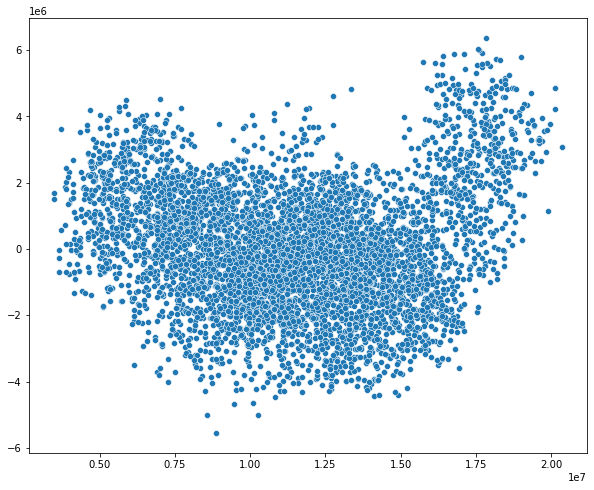

In [179]:
sns.scatterplot(m1.fittedvalues, m1.resid)
plt.show()

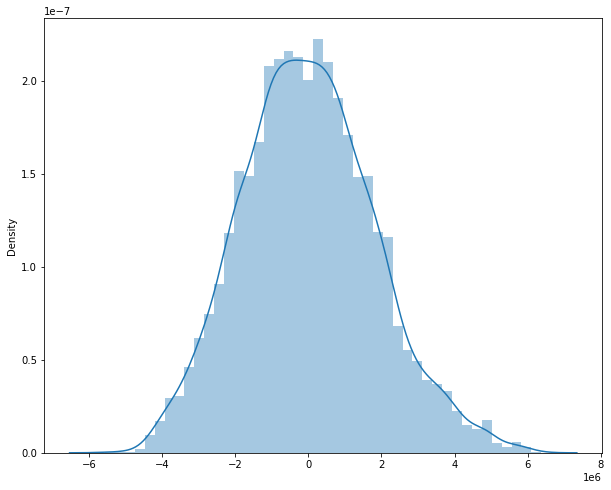

In [180]:
sns.distplot(m1.resid)
plt.show()

In [181]:
m1.resid.skew()

0.25445984809517036

* From the above model summary, we cn see a good Rsquared score with no change in the Adj_Rsquared score.
* The RMSE of train and Test shows a very minimal variance error.
* The durbin watson score shows there is no Auto correlation as its within range.
* The variance in residual shows a moderate Homoscedasticity.
* The residue forms a  near normal distribution.
* The CN No. is below 1000 which shows there is no multicollinearity.
* The pvalues are below the level of significance.
* We can conclude the final model to be a good fit model.

### 

* Lets check if all the features from the final model have significance using SFS method.

In [164]:
LR = LinearRegression()

X = dfm.drop(['SALES_PRICE','Total_Price','N_ROOM','INT_SQFT','N_BATHROOM','UTILITY_AVAIL'],axis=1)
Y = dfm['Total_Price']
Xtr = pd.DataFrame(MMS.fit_transform(Xtrain),columns = Xtrain.columns, index = Xtrain.index)

linreg_forward = sfs(estimator = LR, k_features = 'best', forward = True, scoring = 'neg_root_mean_squared_error')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X, Y)

sfs_forward.k_feature_names_

('N_BEDROOM',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'STREET',
 'MZZONE',
 'Build_Year')

* The SFS returned all the features from the base model concluding it to be a good fit model.
* We can conclude all the features have a significance in predicting the Total price of the Property.

In [165]:
m1.params

const        2065110.323639
N_BEDROOM    2073523.165755
AREA         7130653.315464
SALE_COND     690821.859641
PARK_FACIL   1127955.858195
BUILDTYPE    4864493.353063
STREET        899077.050828
MZZONE       2871728.080873
Build_Year    450095.570809
dtype: float64

The Property price can be predicted from the above parametric values. With a unit change in X values of each feature, the product of the value with the corresponding coefficient is the change in property price from the constant coefficient (Beta0).

                                            *** THANK YOU !!! ***